# Business Case_Creditworthiness_Logistic Regression

**Context:**

XYZ is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

XYZ deploys formal credit to salaried individuals and businesses 4 main financial instruments:

* Personal Loan
* EMI Free Loan
* Personal Overdraft
* Advance Salary Loan

This case study will focus on the underwriting process behind Personal Loan only

**Problem Statement:**

Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?


**Data dictionary:**

* loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
* term : The number of payments on the loan. Values are in months and can be either 36 or 60.
* int_rate : Interest Rate on the loan
* installment : The monthly payment owed by the borrower if the loan originates.
* grade : LoanTap assigned loan grade
* sub_grade : LoanTap assigned loan subgrade
* emp_title :The job title supplied by the Borrower when applying for the loan.*
* emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
* home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.
* annual_inc : The self-reported annual income provided by the borrower during registration.
* verification_status : Indicates if income was verified by LoanTap, not verified, or if the income source was verified
* issue_d : The month which the loan was funded
* loan_status : Current status of the loan - Target Variable
* purpose : A category provided by the borrower for the loan request.
* title : The loan title provided by the borrower
* dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
* earliest_cr_line :The month the borrower's earliest reported credit line was opened
* open_acc : The number of open credit lines in the borrower's credit file.
* pub_rec : Number of derogatory public records
* revol_bal : Total credit revolving balance
* revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
* total_acc : The total number of credit lines currently in the borrower's credit file
* initial_list_status : The initial listing status of the loan. Possible values are – W, F
* application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
* mort_acc : Number of mortgage accounts.
* pub_rec_bankruptcies : Number of public record bankruptcies
* Address: Address of the individual

**Concept Used:**

* Exploratory Data Analysis
* Feature Engineering
* Logistic Regression
* Precision Vs Recall Tradeoff

# Importing Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import TargetEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

# Importing the Dataset

In [7]:
loan = pd.read_csv('logistic_regression.csv')
loan.head()

loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   
2    15600.0   36 months     10.49       506.97     B        B3   
3     7200.0   36 months      6.49       220.65     A        A2   
4    24375.0   60 months     17.27       609.33     C        C5   

                 emp_title emp_length home_ownership  annual_inc  ...  \
0                Marketing  10+ years           RENT    117000.0  ...   
1          Credit analyst     4 years       MORTGAGE     65000.0  ...   
2             Statistician   < 1 year           RENT     43057.0  ...   
3          Client Advocate    6 years           RENT     54000.0  ...   
4  Destiny Management Inc.    9 years       MORTGAGE     55000.0  ...   

  open_acc pub_rec revol_bal revol_util total_acc  initial_list_status  \
0     16.0     0.0   36369.0       41.8      25.0                    w   
1     17.0     0.0   20131.0       53.3      27.0                    f   
2     13.0     0.0   11987.0       92.2      26.0                    f   
3      6.0     0.0    5472.0       21.5      13.0                    f   
4     13.0     0.0   24584.0       69.8      43.0                    f   

  application_type  mort_acc  pub_rec_bankruptcies  \
0       INDIVIDUAL       0.0                   0.0   
1       INDIVIDUAL       3.0                   0.0   
2       INDIVIDUAL       0.0                   0.0   
3       INDIVIDUAL       0.0                   0.0   
4       INDIVIDUAL       1.0                   0.0   

                                             address  
0     0174 Michelle Gateway\r\nMendozaberg, OK 22690  
1  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113  
2  87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113  
3            823 Reid Ford\r\nDelacruzside, MA 00813  
4             679 Luna Roads\r\nGreggshire, VA 11650  

[5 rows x 27 columns]

In [8]:
df = loan.copy()

# 1. Problem Statement and Exploratory Data Analysis

## Problem Statement

<font color = darkcyan size=3>

**_To analyze the dataset to determine the creditworthiness of potential borrowers_**

## Observations on Data

In [ ]:
## Getting the shape of the data
df.shape

(396030, 27)

In [ ]:
## basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [ ]:
df.iloc[:2].T

0  \
loan_amnt                                                    10000.0   
term                                                       36 months   
int_rate                                                       11.44   
installment                                                   329.48   
grade                                                              B   
sub_grade                                                         B4   
emp_title                                                  Marketing   
emp_length                                                 10+ years   
home_ownership                                                  RENT   
annual_inc                                                  117000.0   
verification_status                                     Not Verified   
issue_d                                                     Jan-2015   
loan_status                                               Fully Paid   
purpose                                                     vacation   
title                                                       Vacation   
dti                                                            26.24   
earliest_cr_line                                            Jun-1990   
open_acc                                                        16.0   
pub_rec                                                          0.0   
revol_bal                                                    36369.0   
revol_util                                                      41.8   
total_acc                                                       25.0   
initial_list_status                                                w   
application_type                                          INDIVIDUAL   
mort_acc                                                         0.0   
pub_rec_bankruptcies                                             0.0   
address               0174 Michelle Gateway\r\nMendozaberg, OK 22690   

                                                                      1  
loan_amnt                                                        8000.0  
term                                                          36 months  
int_rate                                                          11.99  
installment                                                      265.68  
grade                                                                 B  
sub_grade                                                            B5  
emp_title                                               Credit analyst   
emp_length                                                      4 years  
home_ownership                                                 MORTGAGE  
annual_inc                                                      65000.0  
verification_status                                        Not Verified  
issue_d                                                        Jan-2015  
loan_status                                                  Fully Paid  
purpose                                              debt_consolidation  
title                                                Debt consolidation  
dti                                                               22.05  
earliest_cr_line                                               Jul-2004  
open_acc                                                           17.0  
pub_rec                                                             0.0  
revol_bal                                                       20131.0  
revol_util                                                         53.3  
total_acc                                                          27.0  
initial_list_status                                                   f  
application_type                                             INDIVIDUAL  
mort_acc                                                            3.0  
pub_rec_bankruptcies                                                0.0  
address               1076 Carney Fort Apt. 347\r\nL

### Conversion of categorical attributes to 'category'

In [ ]:
df.columns[df.dtypes == 'object']

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [ ]:
# Conversion to catagories
cc = ['term', 'grade', 'sub_grade', 'emp_title',
       'home_ownership', 'verification_status', 'loan_status',
       'purpose', 'title', 'initial_list_status',
       'application_type']
df[cc] = df[cc].astype('category')

### Conversion of datetime attributes to datetime

In [ ]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y', errors='coerce')
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%Y', errors='coerce')

### Feature Extraction: extracting numerical features from emp_length

In [ ]:
# We can convert 'emp_length' to Numerical column.
# '<1 year' to '0 year' and '10+ year' to '10 year'
df['emp_length'].replace(to_replace = {'< 1 year':'0 year','10+ years':'10 years' }, inplace=True)
df['emp_length'] = df['emp_length'].str.split(' ').str[0]

In [ ]:
df['emp_length'] = df['emp_length'].astype('float')

###  Feature Extraction: Extracting Place and State from the address column and dropping the address field

In [ ]:
df[['house/street', 'region/state']] = df['address'].str.split('\n', expand = True)
df['region'] = df['region/state'].str[:-8].str.replace(',', '')
df['state&zip'] = df['region/state'].str[-8:]
df['state'] = df['state&zip'].str[:-6]
df['zip'] = df['state&zip'].str[-5:]
df.drop(columns=['address', 'house/street', 'region/state', 'state&zip', 'zip'], inplace=True)
df.head()

loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   
2    15600.0   36 months     10.49       506.97     B        B3   
3     7200.0   36 months      6.49       220.65     A        A2   
4    24375.0   60 months     17.27       609.33     C        C5   

                 emp_title  emp_length home_ownership  annual_inc  ...  \
0                Marketing        10.0           RENT    117000.0  ...   
1          Credit analyst          4.0       MORTGAGE     65000.0  ...   
2             Statistician         0.0           RENT     43057.0  ...   
3          Client Advocate         6.0           RENT     54000.0  ...   
4  Destiny Management Inc.         9.0       MORTGAGE     55000.0  ...   

  pub_rec revol_bal revol_util total_acc initial_list_status  \
0     0.0   36369.0       41.8      25.0                   w   
1     0.0   20131.0       53.3      27.0                   f   
2     0.0   11987.0       92.2      26.0                   f   
3     0.0    5472.0       21.5      13.0                   f   
4     0.0   24584.0       69.8      43.0                   f   

   application_type mort_acc  pub_rec_bankruptcies         region  state  
0        INDIVIDUAL      0.0                   0.0   Mendozaberg      OK  
1        INDIVIDUAL      3.0                   0.0    Loganmouth      SD  
2        INDIVIDUAL      0.0                   0.0   New Sabrina      WV  
3        INDIVIDUAL      0.0                   0.0  Delacruzside      MA  
4        INDIVIDUAL      1.0                   0.0    Greggshire      VA  

[5 rows x 28 columns]

In [ ]:
## Summary
df.describe().T

count                           mean  \
loan_amnt             396030.0                   14113.888089   
int_rate              396030.0                        13.6394   
installment           396030.0                     431.849698   
emp_length            377729.0                       5.938578   
annual_inc            396030.0                   74203.175798   
issue_d                 396030  2014-02-02 15:57:58.045602560   
dti                   396030.0                      17.379514   
earliest_cr_line        396030  1998-05-03 09:34:15.062495488   
open_acc              396030.0                      11.311153   
pub_rec               396030.0                       0.178191   
revol_bal             396030.0                   15844.539853   
revol_util            395754.0                      53.791749   
total_acc             396030.0                      25.414744   
mort_acc              358235.0                       1.813991   
pub_rec_bankruptcies  395495.0                       0.121648   

                                      min                  25%  \
loan_amnt                           500.0               8000.0   
int_rate                             5.32                10.49   
installment                         16.08               250.33   
emp_length                            0.0                  3.0   
annual_inc                            0.0              45000.0   
issue_d               2007-06-01 00:00:00  2013-05-01 00:00:00   
dti                                   0.0                11.28   
earliest_cr_line      1944-01-01 00:00:00  1994-10-01 00:00:00   
open_acc                              0.0                  8.0   
pub_rec                               0.0                  0.0   
revol_bal                             0.0               6025.0   
revol_util                            0.0                 35.8   
total_acc                             2.0                 17.0   
mort_acc                              0.0                  0.0   
pub_rec_bankruptcies                  0.0                  0.0   

                                      50%                  75%  \
loan_amnt                         12000.0              20000.0   
int_rate                            13.33                16.49   
installment                        375.43                567.3   
emp_length                            6.0                 10.0   
annual_inc                        64000.0              90000.0   
issue_d               2014-04-01 00:00:00  2015-03-01 00:00:00   
dti                                 16.91                22.98   
earliest_cr_line      1999-09-01 00:00:00  2003-04-01 00:00:00   
open_acc                             10.0                 14.0   
pub_rec                               0.0                  0.0   
revol_bal                         11181.0              19620.0   
revol_util                           54.8                 72.9   
total_acc                            24.0                 32.0   
mort_acc                              1.0                  3.0   
pub_rec_bankruptcies                  0.0                  0.0   

                                      max           std  
loan_amnt                         40000.0   8357.441341  
int_rate                            30.99      4.472157  
installment                       1533.81     250.72779  
emp_length                           10.0      3.645623  
annual_inc                      8706582.0  61637.621158  
issue_d               2016-12-01 00:00:00           NaN  
dti                                9999.0     18.019092  
earliest_cr_line      2013-10-01 00:00:00           NaN  
open_acc                             90.0      5.137649  
pub_rec                              86.0      0.530671  
revol_bal                       1743266.0  20591.836109  
revol_util                          892.3     24.452193  
total_acc                           151.0     11.886991  
mort_acc                             34.0       2.14793  


In [ ]:
df.describe(include=['object','category']).T

count  unique                 top    freq
term                 396030       2           36 months  302005
grade                396030       7                   B  116018
sub_grade            396030      35                  B3   26655
emp_title            373103  173105             Teacher    4389
home_ownership       396030       6            MORTGAGE  198348
verification_status  396030       3            Verified  139563
loan_status          396030       2          Fully Paid  318357
purpose              396030      14  debt_consolidation  234507
title                394274   48816  Debt consolidation  152472
initial_list_status  396030       2                   f  238066
application_type     396030       3          INDIVIDUAL  395319
region               396030   67513                DPO    14289
state                396030      54                  AP   14308

### Observations
* We have large sum of data
* Presence of missing values and Outliers

## Non-graphical Analysis

In [ ]:
cat_col = df.columns[(df.dtypes == 'category') | (df.dtypes ==  'object')]
cat_col

Index(['term', 'grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'loan_status', 'purpose', 'title',
       'initial_list_status', 'application_type', 'region', 'state'],
      dtype='object')

In [ ]:
## Unique values in each columns
uni_cnt = pd.DataFrame(columns= ['Variables', 'Unique Values'])
for i in cat_col:
    uni_cnt.loc[len(uni_cnt.index)] = [i, df[i].nunique()]
uni_cnt

Variables  Unique Values
0                  term              2
1                 grade              7
2             sub_grade             35
3             emp_title         173105
4        home_ownership              6
5   verification_status              3
6           loan_status              2
7               purpose             14
8                 title          48816
9   initial_list_status              2
10     application_type              3
11               region          67513
12                state             54

In [ ]:
## Getting the value counts and Proportions for categorical columns
for i in cat_col:
    print("Value counts and Proportions of "+i, "\n")
    print(pd.DataFrame({
        "Count": df[i].value_counts(),
        "Proportion": df[i].value_counts(normalize=True).round(2)
    }))
    print("*"*50)

Value counts and Proportions of term 

             Count  Proportion
term                          
 36 months  302005        0.76
 60 months   94025        0.24
**************************************************
Value counts and Proportions of grade 

        Count  Proportion
grade                    
B      116018        0.29
C      105987        0.27
A       64187        0.16
D       63524        0.16
E       31488        0.08
F       11772        0.03
G        3054        0.01
**************************************************
Value counts and Proportions of sub_grade 

           Count  Proportion
sub_grade                   
B3         26655        0.07
B4         25601        0.06
C1         23662        0.06
C2         22580        0.06
B2         22495        0.06
B5         22085        0.06
C3         21221        0.05
C4         20280        0.05
B1         19182        0.05
A5         18526        0.05
C5         18244        0.05
D1         15993        0.04
A4         

### Observations
* Target veriable, loan_status, have imbalance. 80% of the data of Fully paid (class 1) and 20% is charged off (class 0)
* 76% of the loans are of 36 months term
* Teacher and Manager are the most common emp_title
* 50% of the home ownership is Morgage and 40% of Rent
* 68% of the borrowers have verified/source verified income, 32% are not verified
* Purpose and title are depicting almost the same information
* debt consolidation and credit card refinancing, and home improvement are the most common purpose and titles
* majority of the application type is INDIVIDUAL
* initial_list_status is distributed between 60% and 40% for f and w category

## Univariate Analysis

In [ ]:
sns.set_palette(palette="Set2",n_colors=18)
sns.set_style("whitegrid", {'axes.facecolor': '0.97'})

In [ ]:
## Getting the Numerical columns
num_col = df.columns[(df.dtypes == 'int64') | (df.dtypes == 'float64')]
num_col

Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies'],
      dtype='object')

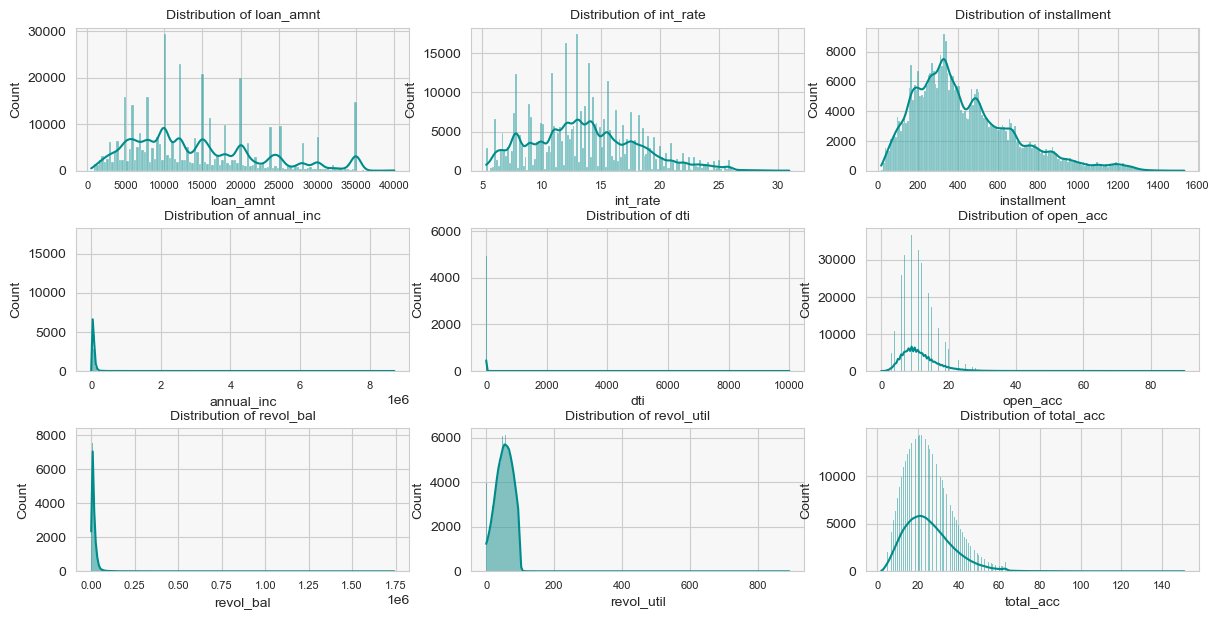

In [ ]:
# Getting the distribution of numerical variables
num_cols = ['loan_amnt', 'int_rate', 'installment', 'annual_inc',
       'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc']

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 6))
plt.tight_layout()
plt.subplots_adjust(hspace=0.4)

for i, col in enumerate(num_cols):
    row_idx = i // 3
    col_idx = i % 3

    sns.histplot(df[col], kde=True, color= 'darkcyan', ax=axs[row_idx, col_idx]);

    axs[row_idx, col_idx].set_title(f'Distribution of {col}', fontsize=10)
    axs[row_idx, col_idx].tick_params(axis='x', labelrotation=0, labelsize=8)

plt.show()

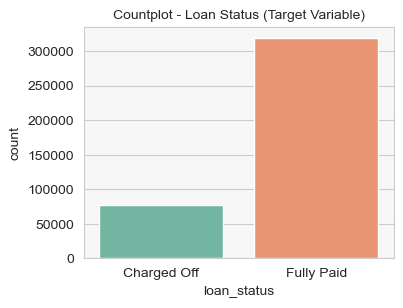

In [ ]:
## Target Variable
plt.figure(figsize=(4,3))
sns.countplot(data = df, x = 'loan_status');
plt.title('Countplot - Loan Status (Target Variable)', fontsize=10);

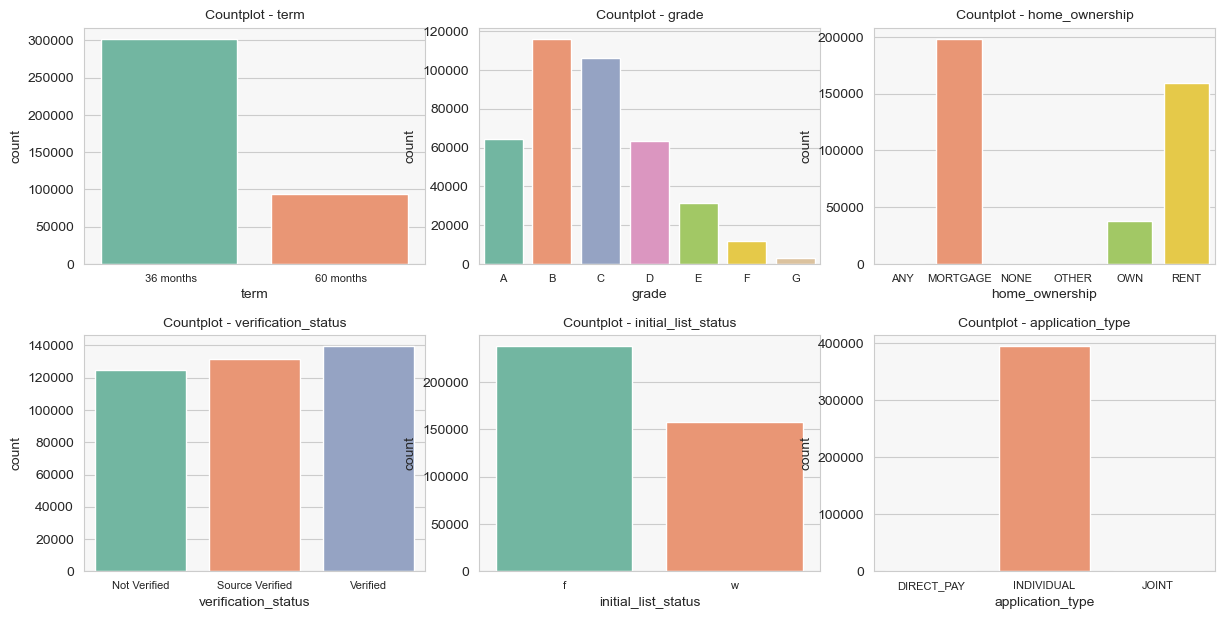

In [ ]:
cat_cols = ['term', 'grade' , 'home_ownership', 'verification_status', 'initial_list_status', 'application_type']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

for i, col in enumerate(cat_cols):
    row_idx = i // 3
    col_idx = i % 3

    sns.countplot(data=df, x=col, ax=axs[row_idx, col_idx])

    axs[row_idx, col_idx].set_title(f'Countplot - {col}', fontsize=10)
    axs[row_idx, col_idx].tick_params(axis='x', labelrotation=0, labelsize=8)

plt.show()

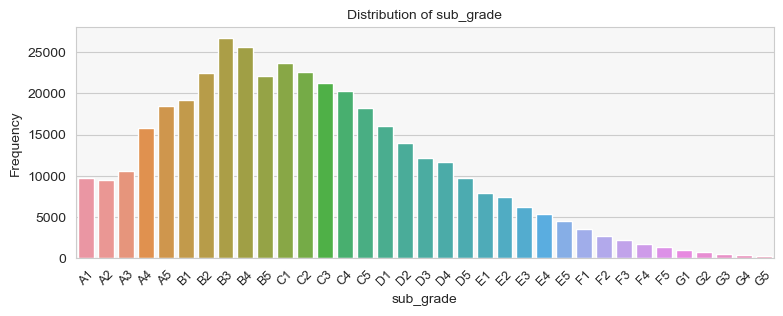

In [ ]:
plt.figure(figsize=(9,3))

sns.countplot(data=df, x='sub_grade')
plt.title(f'Distribution of sub_grade', fontsize = 10)
plt.ylabel('Frequency')
plt.xticks(rotation = 45, fontsize = 9)
plt.show()

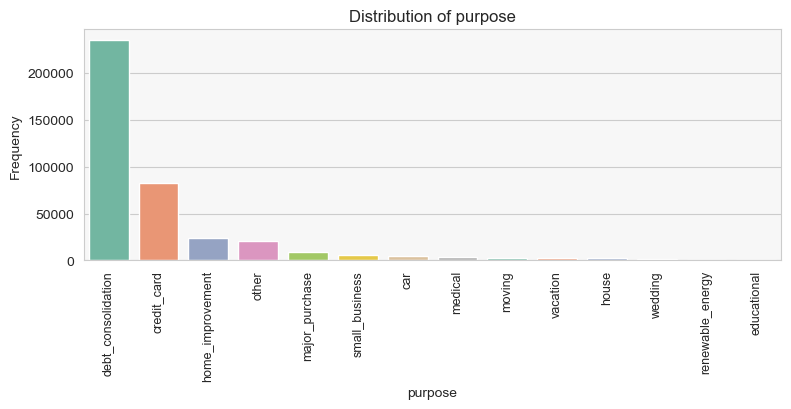

In [ ]:
plt.figure(figsize=(9,3))
sns.countplot(data=df, x='purpose', order = df['purpose'].value_counts().sort_values(ascending=False).index)
plt.title(f'Distribution of purpose', fontsize = 12)
plt.ylabel('Frequency')
plt.xticks(rotation = 90, fontsize = 9)
plt.show()

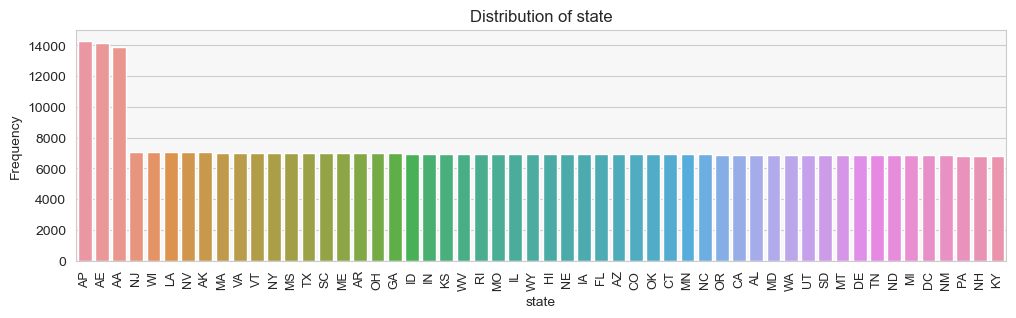

In [ ]:
plt.figure(figsize=(12,3))
sns.countplot(data=df, x='state', order = df['state'].value_counts().sort_values(ascending=False).index)
plt.title(f'Distribution of state', fontsize = 12)
plt.ylabel('Frequency')
plt.xticks(rotation = 90, fontsize = 9)
plt.show()

### Observations

* Distribution of the numerial variable isn't normally distributed
* Skewness observed towards the right side for most of the numerical features
* Some of the numerical features are discrete in nature
* Target veriable, loan_status, have imbalance. 80% of the data of Fully paid (class 1) and 20% is charged off (class 0)
* 76% of the loans are of 36 months term
* Teacher and Manager are the most common emp_title
* 50% of the home ownership is Morgage and 40% of Rent
* 68% of the borrowers have verified/source verified income, 32% are not verified
* Purpose and title are depicting almost the same information
* debt consolidation and credit card refinancing, and home improvement are the most common purpose and titles
* majority of the application type is INDIVIDUAL
* initial_list_status is distributed between 60% and 40% for f and w category
* Geography doesn't seems to have an impact as it is evenly distributed for most of the state

## Bivariate Analysis

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'region', 'state'],
      dtype='object')

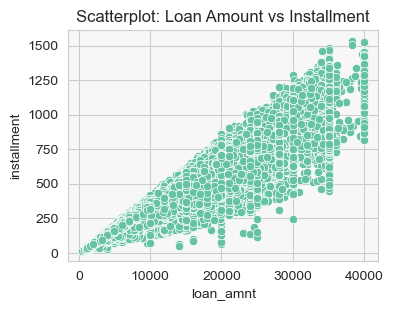

In [ ]:
plt.figure(figsize=(4,3));
sns.scatterplot(x=df['loan_amnt'], y= df['installment']);
plt.title('Scatterplot: Loan Amount vs Installment');

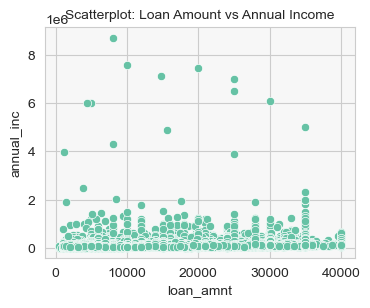

In [ ]:
plt.figure(figsize=(4,3));
sns.scatterplot(x=df['loan_amnt'], y= df['annual_inc'])
plt.title('Scatterplot: Loan Amount vs Annual Income', fontsize= 10);

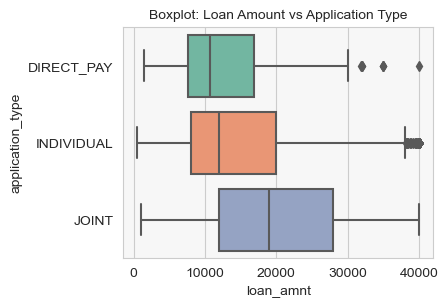

In [ ]:
plt.figure(figsize=(4,3));
sns.boxplot(x= df['loan_amnt'], y = df['application_type']);
plt.title('Boxplot: Loan Amount vs Application Type', fontsize= 10);

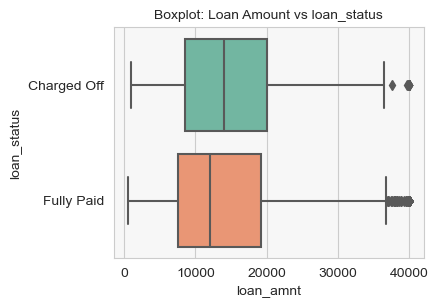

In [ ]:
plt.figure(figsize=(4,3));
sns.boxplot(x= df['loan_amnt'], y = df['loan_status']);
plt.title('Boxplot: Loan Amount vs loan_status', fontsize= 10);

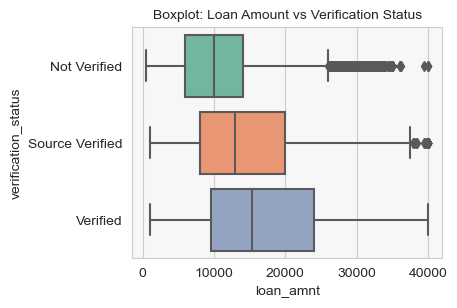

In [ ]:
plt.figure(figsize=(4,3));
sns.boxplot(x= df['loan_amnt'], y = df['verification_status']);
plt.title('Boxplot: Loan Amount vs Verification Status', fontsize= 10);

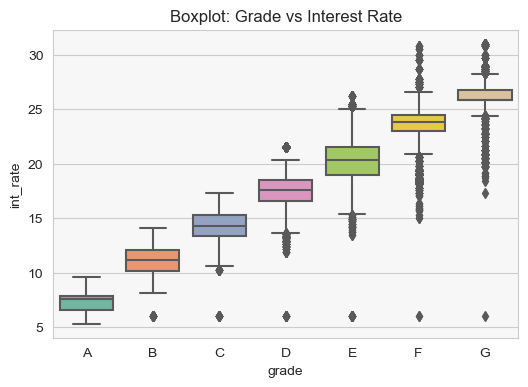

In [ ]:
plt.figure(figsize=(6,4));
sns.boxplot(y=df['int_rate'], x=df['grade']);
plt.title('Boxplot: Grade vs Interest Rate');

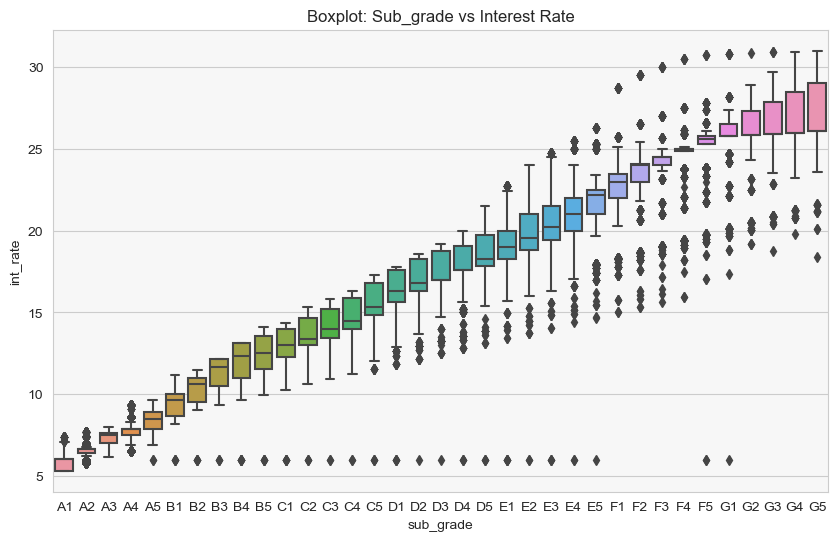

In [ ]:
plt.figure(figsize=(10,6));
sns.boxplot(y=df['int_rate'], x=df['sub_grade']);
plt.title('Boxplot: Sub_grade vs Interest Rate');

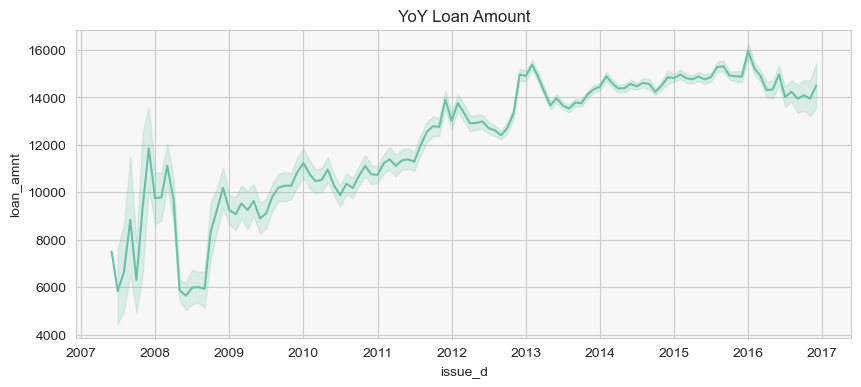

In [ ]:
plt.figure(figsize=(10,4));
sns.lineplot(x=df['issue_d'], y=df['loan_amnt'])
plt.title('YoY Loan Amount');

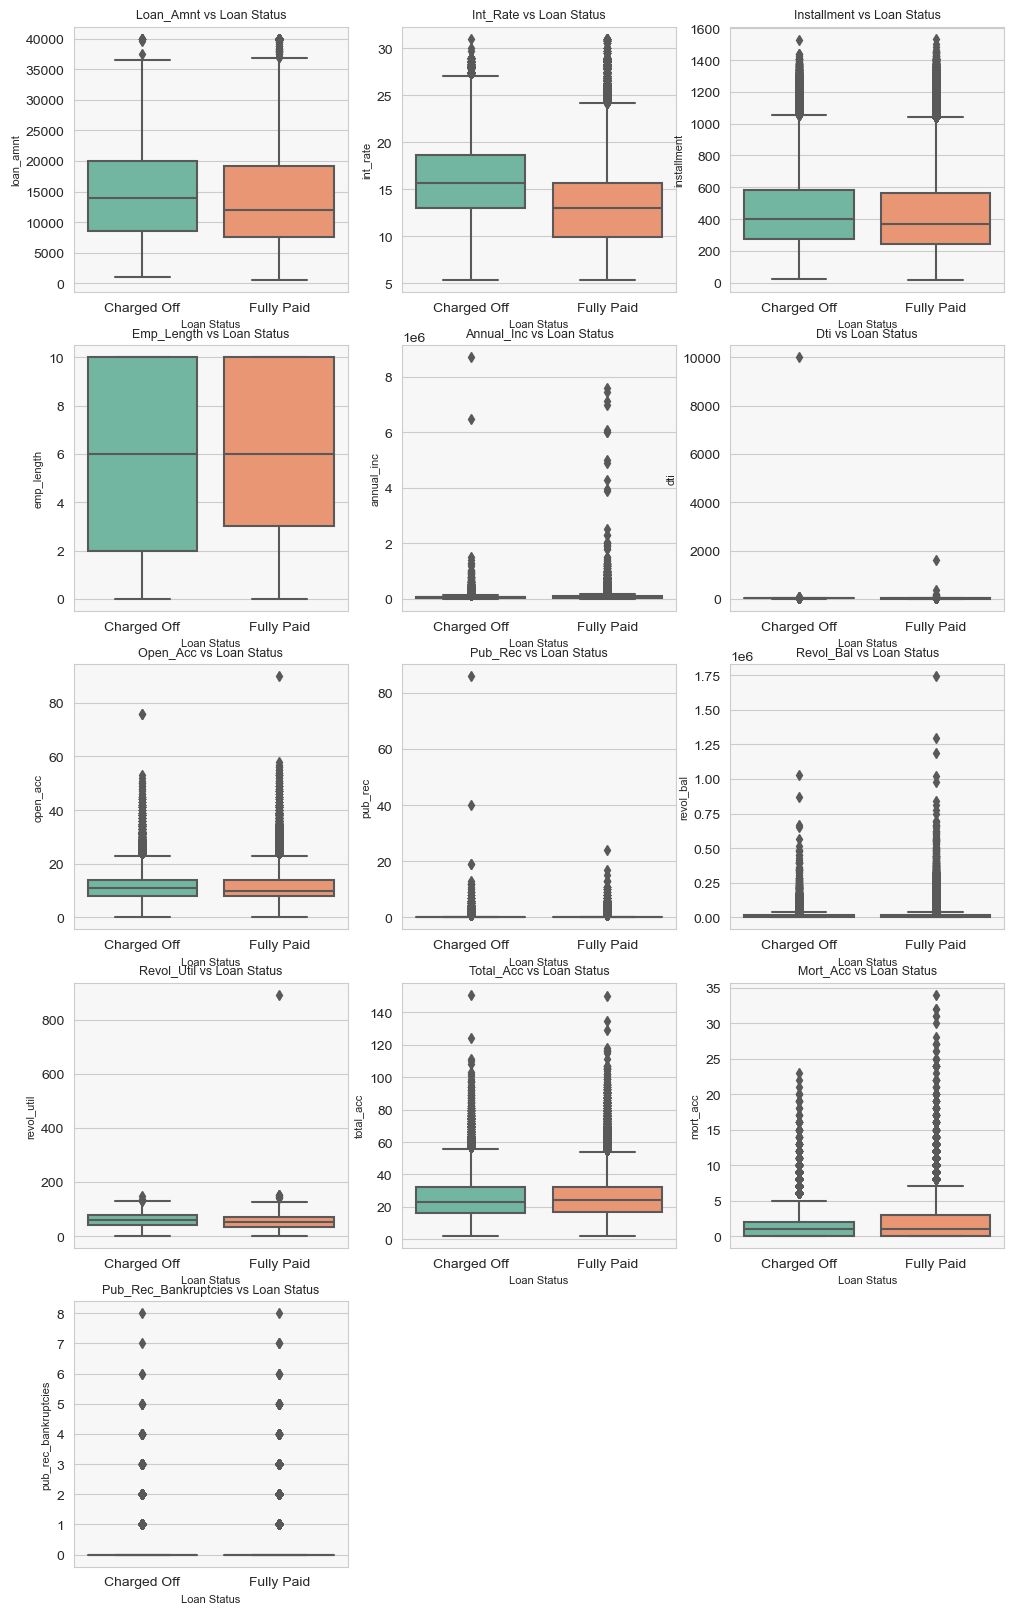

In [ ]:
#### Continious Vs Target Variables:-
plt.figure(figsize=(12,20))
fig.subplots_adjust(top = 2.5)
i = 1
for var in num_col:
    plt.subplot(5,3,i)
    sns.boxplot(data = df, y = var, x = 'loan_status')
    plt.title(f'{var.title()} vs Loan Status', fontsize=9)
    plt.ylabel(var, fontsize=8)
    plt.xlabel('Loan Status', fontsize=8)
    i+=1
plt.show()

### Observations
* Loan Amount and Installment have linear relationship
* Interest Rates varies based on grades and subgrades
* loan_amnt, Int rates, and installments are higher for the charge off loan, implies LoanTap's risk mitigation
* Annual Income is slightly higher for fully paid loan, implies that people with good income paid their loan


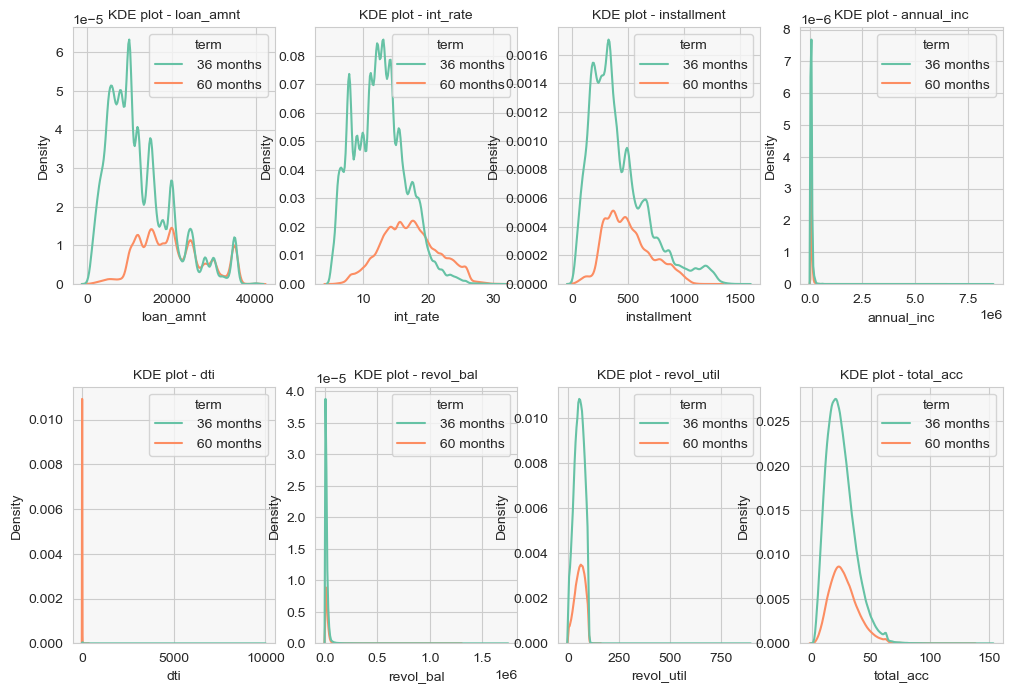

In [ ]:
num_cols = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti','revol_bal', 'revol_util', 'total_acc']
fig = plt.figure(figsize=(12,8))
# fig.subplots_adjust(top = 1.4)
plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
i = 1
for n in num_cols:
    plt.subplot(2,4,i)
    sns.kdeplot(x=n, hue='term', data= df)
    plt.title(f'KDE plot - {n}', fontsize=10)
    i+=1

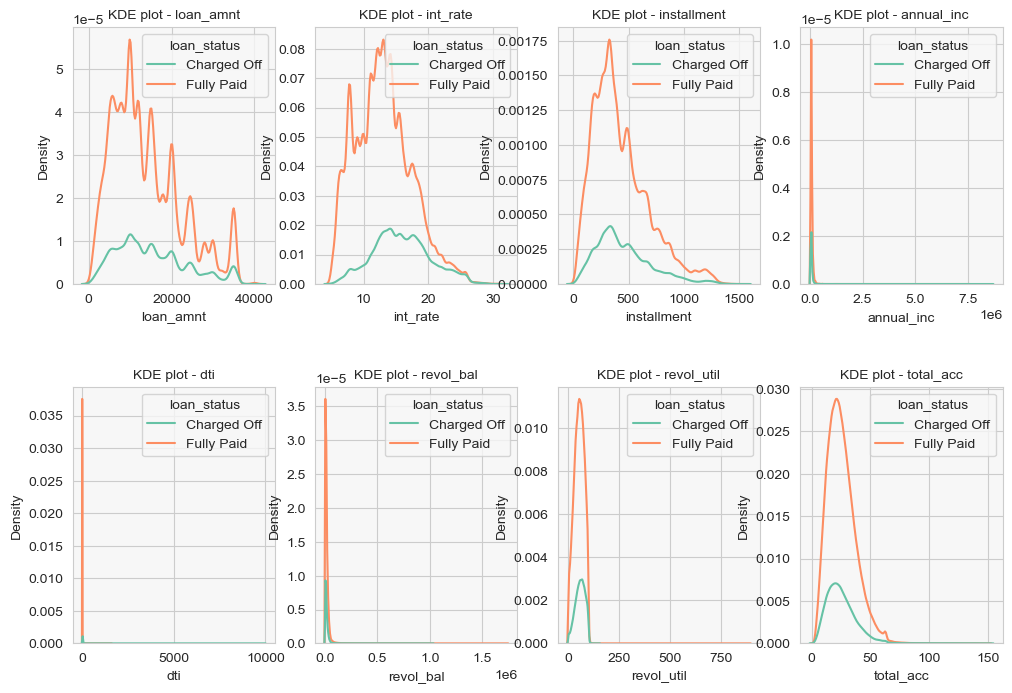

In [ ]:
num_cols = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti','revol_bal', 'revol_util', 'total_acc']
fig = plt.figure(figsize=(12,8))

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
i = 1
for n in num_cols:
    plt.subplot(2,4,i)
    sns.kdeplot(x=n, hue='loan_status', data= df)
    plt.title(f'KDE plot - {n}', fontsize=10)
    i+=1

### Observations
* Higher loan_amnt for longer term
* Lower graded individuals has taken higher sum of loans
* Verified individuals get higher loan_amnt
* Interest rates charged is higher for lower grades

In [ ]:
pd.crosstab(df['loan_status'], df['home_ownership'], normalize='index').round(2)

home_ownership  ANY  MORTGAGE  NONE  OTHER   OWN  RENT
loan_status                                           
Charged Off     0.0      0.43   0.0    0.0  0.10  0.47
Fully Paid      0.0      0.52   0.0    0.0  0.09  0.39

In [ ]:
pd.crosstab(df['loan_status'], df['term'], normalize='index')

term          36 months   60 months
loan_status                        
Charged Off    0.613341    0.386659
Fully Paid     0.798993    0.201007

In [ ]:
pd.crosstab(df['loan_status'], df['grade'], normalize='index')

grade               A         B         C         D         E         F  \
loan_status                                                               
Charged Off  0.051961  0.187800  0.289019  0.236092  0.151468  0.064849   
Fully Paid   0.188942  0.318608  0.262404  0.141935  0.061952  0.021155   

grade               G  
loan_status            
Charged Off  0.018810  
Fully Paid   0.005004

In [ ]:
pd.crosstab(df['loan_status'], df['verification_status'], normalize='index')

verification_status  Not Verified  Source Verified  Verified
loan_status                                                 
Charged Off              0.235693         0.363241  0.401066
Fully Paid               0.335394         0.324073  0.340533

In [ ]:
pd.crosstab(df['loan_status'], df['initial_list_status'], normalize='index')

initial_list_status         f         w
loan_status                            
Charged Off          0.591724  0.408276
Fully Paid           0.603426  0.396574

<Figure size 1200x1200 with 0 Axes>

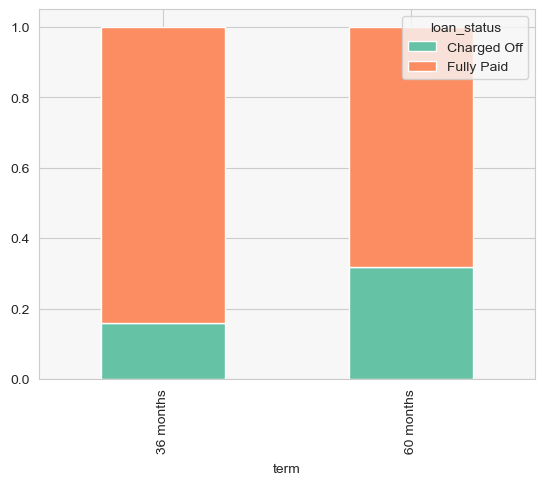

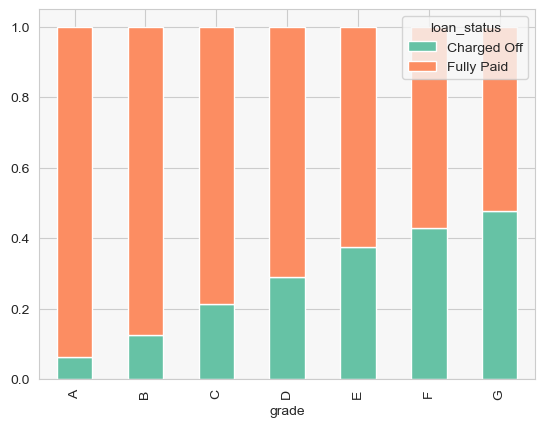

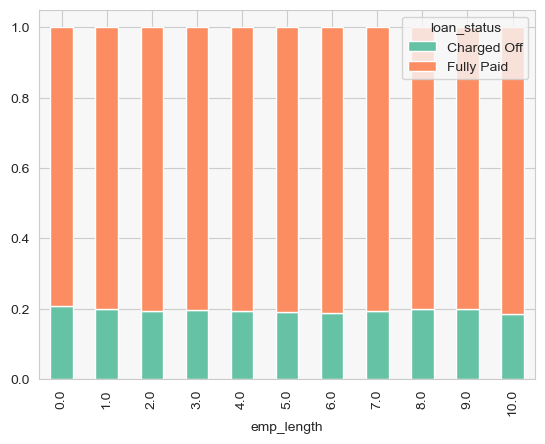

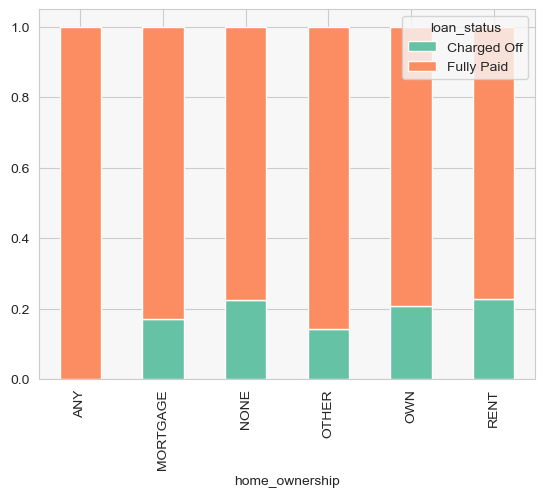

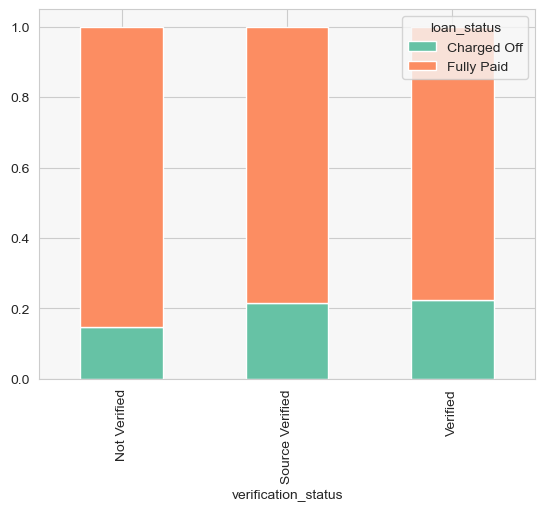

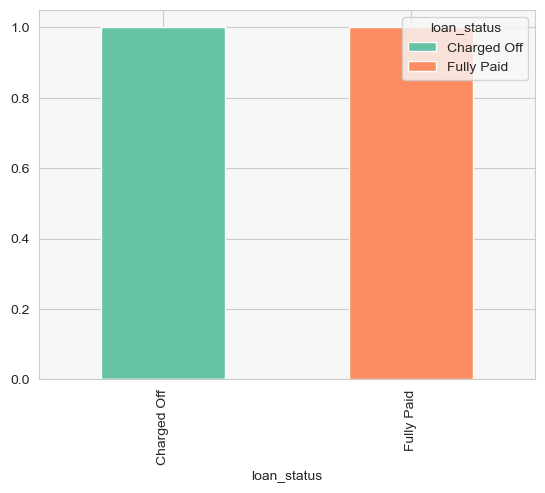

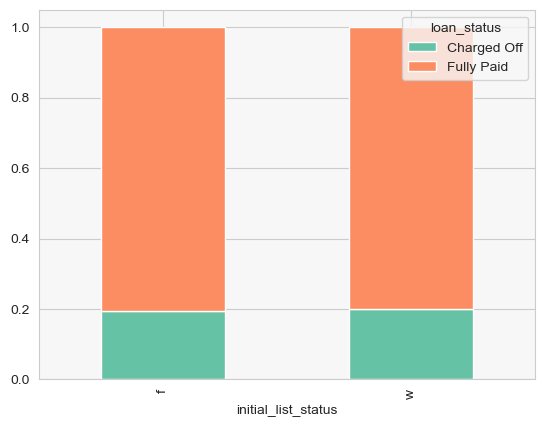

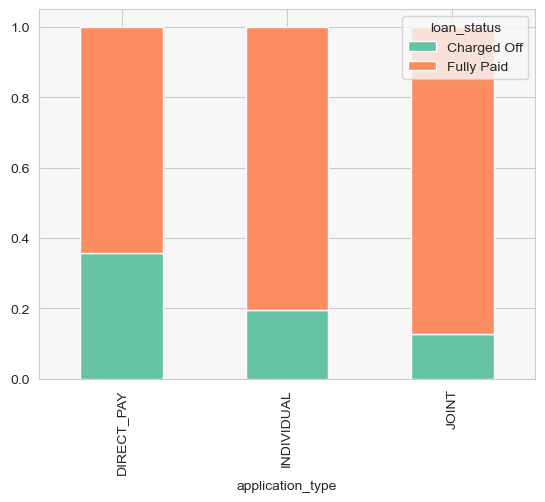

In [ ]:
cat_cols = ['term', 'grade', 'emp_length',
       'home_ownership', 'verification_status', 'loan_status', 'initial_list_status',
       'application_type']
fig = plt.figure(figsize=(12,12))
for c in cat_cols:
    ax = pd.crosstab(df[c], df['loan_status'], normalize='index').plot(kind='bar', stacked=True)
    plt.show()

In [ ]:
pd.crosstab(df['state'], df['loan_status'], normalize='index').sort_values(by=['Charged Off'], ascending=False)

loan_status  Charged Off  Fully Paid
state                               
WY              0.208135    0.791865
WV              0.204061    0.795939
PA              0.202784    0.797216
NV              0.202472    0.797528
WA              0.202175    0.797825
MT              0.201947    0.798053
MS              0.201913    0.798087
KY              0.200882    0.799118
AP              0.200797    0.799203
ID              0.199626    0.800374
KS              0.199568    0.800432
GA              0.199512    0.800488
NE              0.199365    0.800635
IL              0.198587    0.801413
NC              0.198522    0.801478
AR              0.198163    0.801837
WI              0.197995    0.802005
AK              0.197612    0.802388
MO              0.197579    0.802421
SD              0.197038    0.802962
TN              0.196681    0.803319
UT              0.196602    0.803398
AZ              0.196589    0.803411
SC              0.196472    0.803528
MD              0.196346    0.803654
MA              0.196098    0.803902
TX              0.195714    0.804286
DC              0.195557    0.804443
AL              0.195419    0.804581
AE              0.195168    0.804832
NM              0.195118    0.804882
VA              0.195101    0.804899
IA              0.194773    0.805227
AA              0.194770    0.805230
CO              0.194677    0.805323
RI              0.194669    0.805331
ME              0.194349    0.805651
MI              0.194339    0.805661
CT              0.194235    0.805765
NJ              0.194190    0.805810
ND              0.193934    0.806066
LA              0.193690    0.806310
FL              0.193469    0.806531
NH              0.193458    0.806542
OH              0.193141    0.806859
DE              0.192028    0.807972
OK              0.192013    0.807987
HI              0.191858    0.808142
IN              0.191147    0.808853
VT              0.190578    0.809422
CA              0.190490    0.809510
OR              0.189620    0.810380
NY              0.186465    0.813535
MN              0.180910    0.819090

## Multivariate Analysis

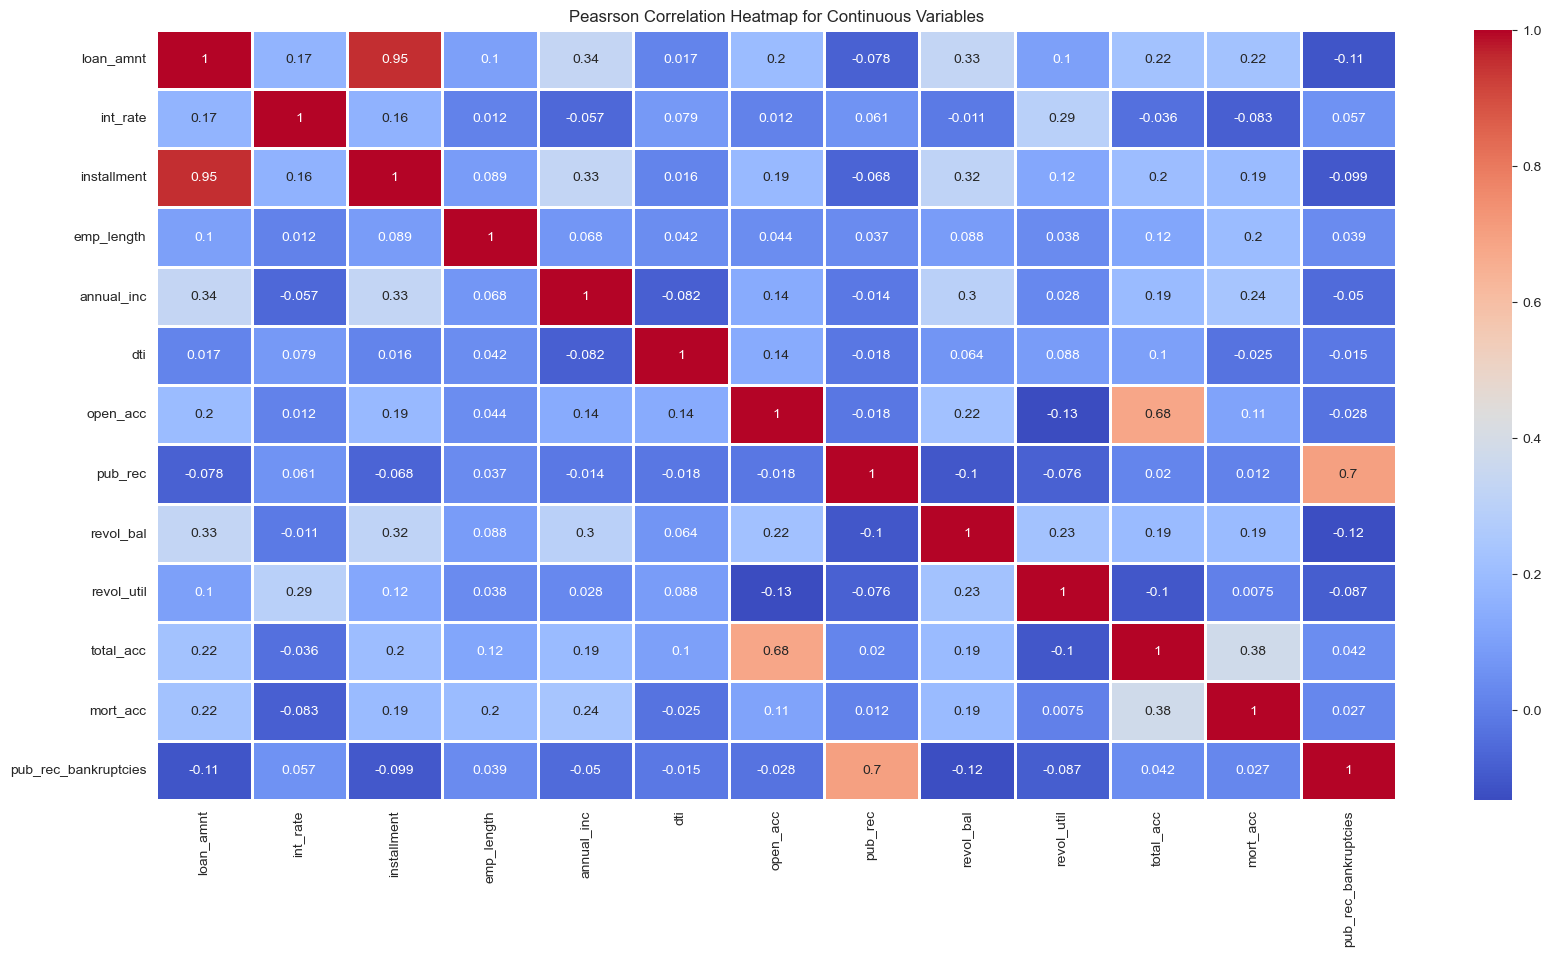

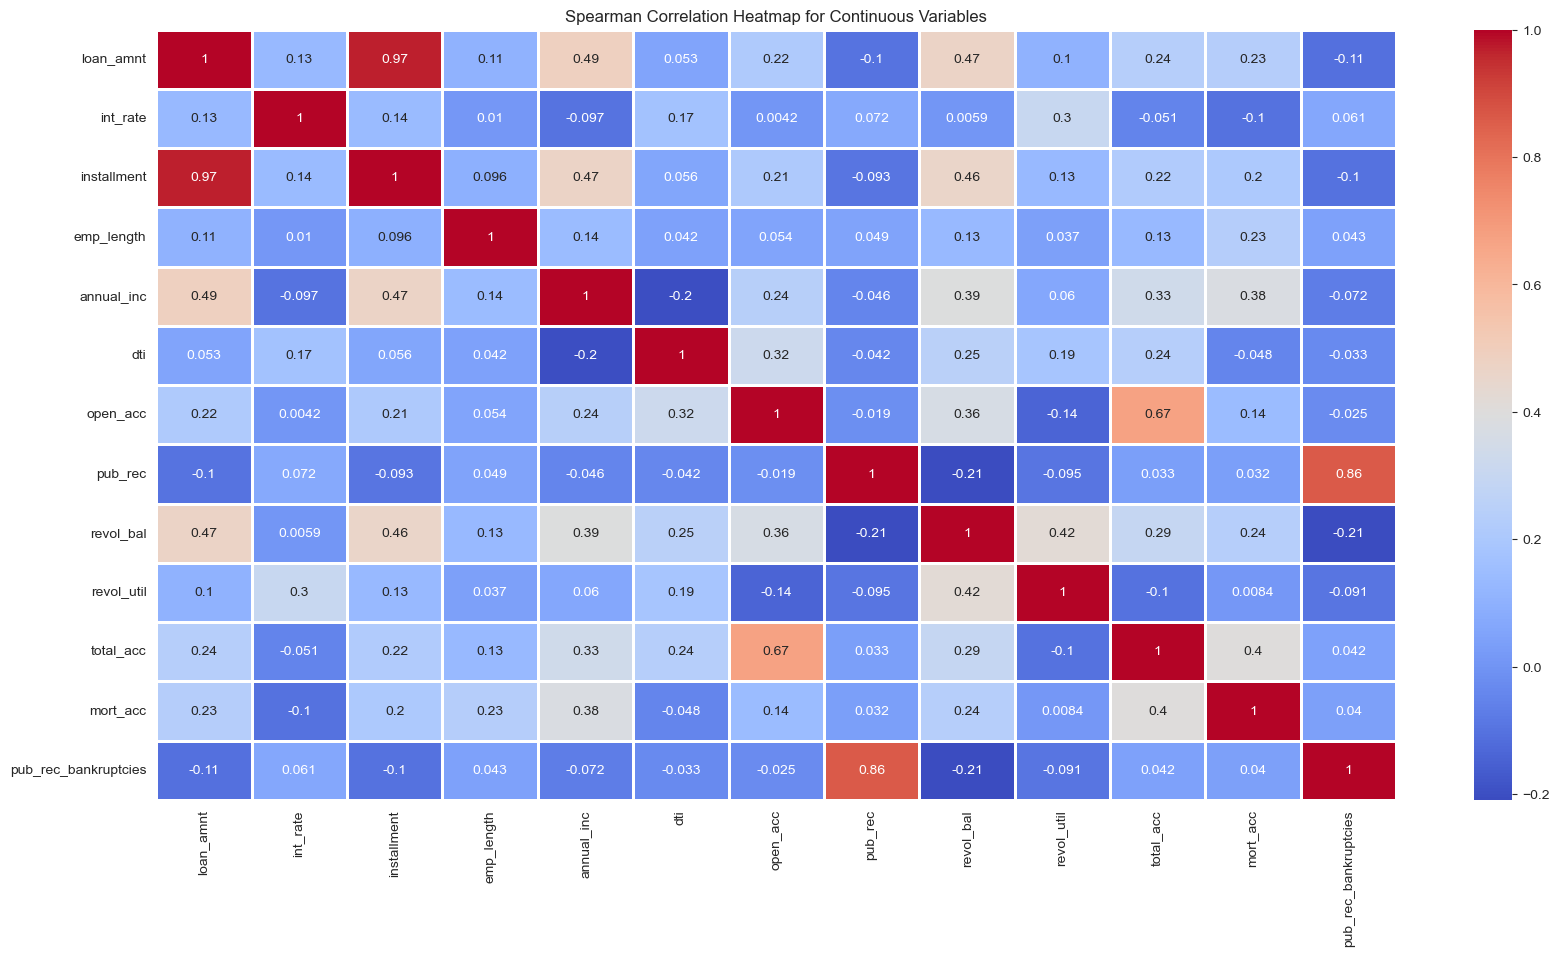

In [ ]:
pearson_corr_data = df[num_col].corr()
spearman_corr_data = df[num_col].corr(method='spearman')

plt.figure(figsize=(20,10))
sns.heatmap(
    pearson_corr_data,
    annot=True,
    linewidth = 1,
    cmap='coolwarm'
)
plt.title("Peasrson Correlation Heatmap for Continuous Variables")


plt.figure(figsize=(20,10))
sns.heatmap(
    spearman_corr_data,
    annot=True,
    linewidth = 1,
    cmap='coolwarm'

)
plt.title("Spearman Correlation Heatmap for Continuous Variables")
plt.show()

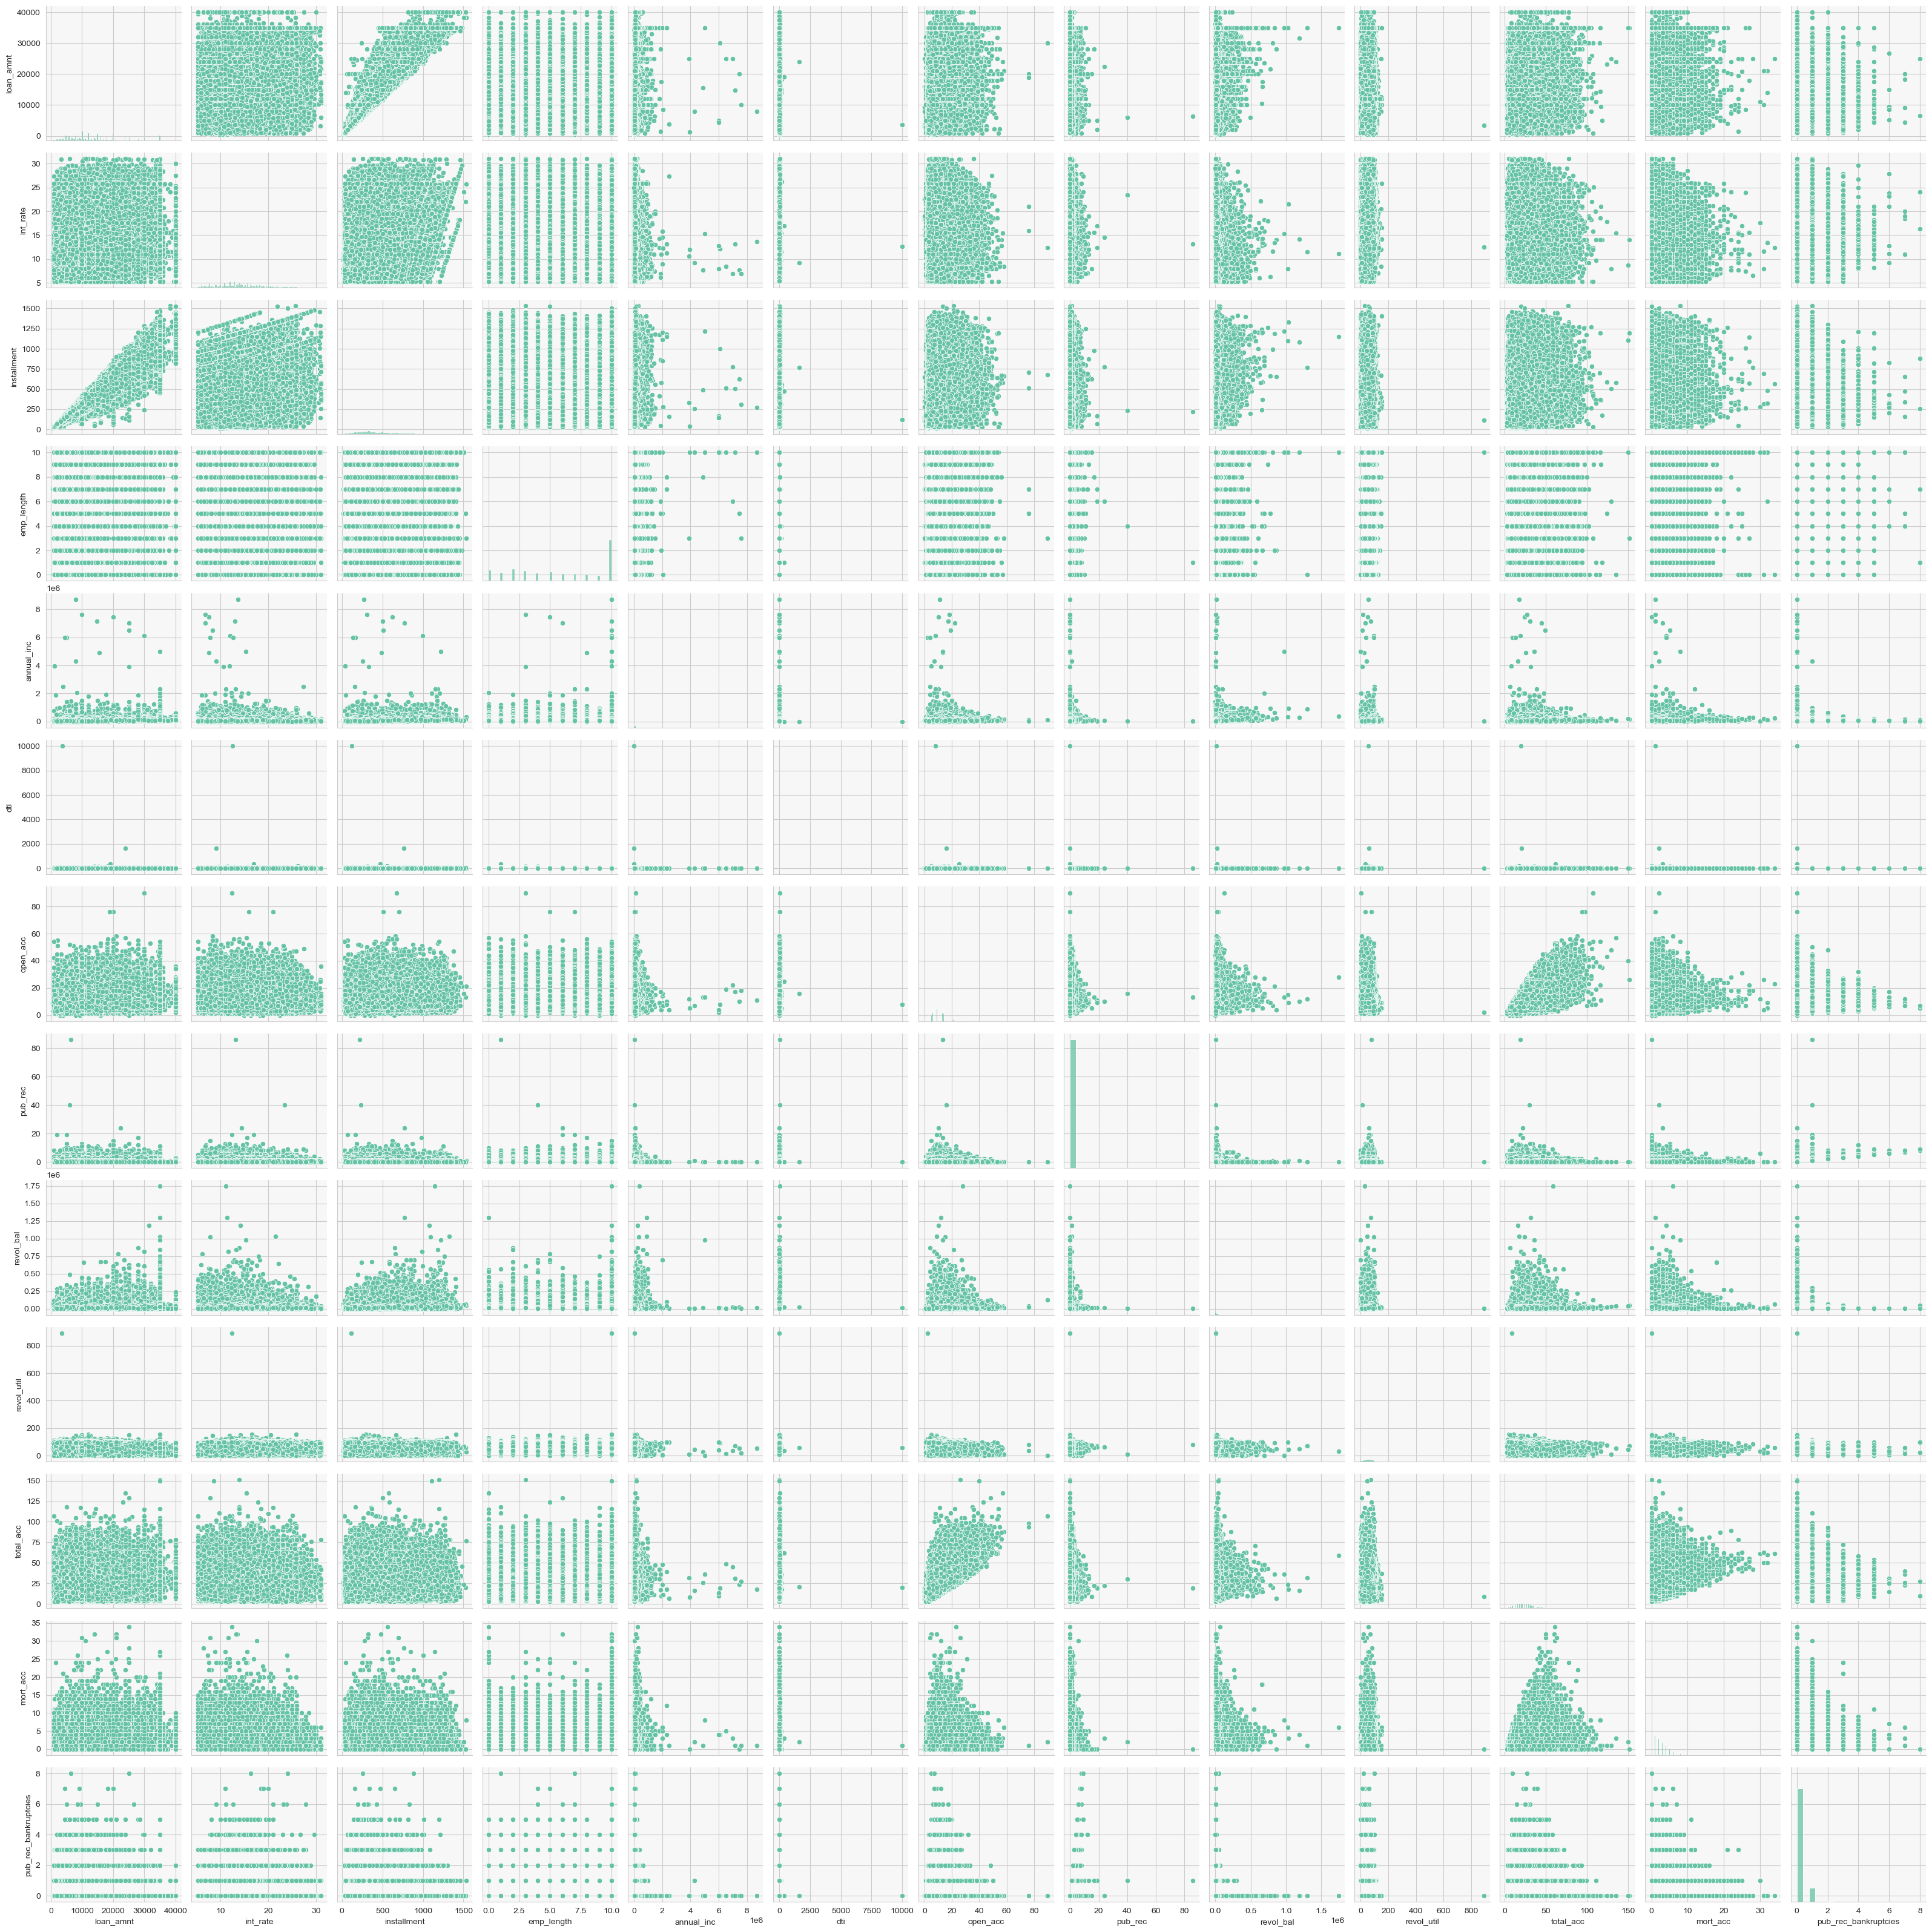

In [ ]:
sns.pairplot(df)

# 2. Data Preprocessing

## Duplicate value check

In [ ]:
df[df.columns].duplicated().sum()

0

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'region', 'state'],
      dtype='object')

In [ ]:
df[['loan_amnt', 'term', 'int_rate', 'installment', 'issue_d', 'region']].duplicated().sum()

4306

In [ ]:
df[['loan_amnt', 'term', 'int_rate', 'installment', 'issue_d', 'earliest_cr_line']].duplicated().sum()

5229

### Observation
* We can say, but not certainly, that there are some duplication in the dataset.
* The duplicate values aren't significant thus we are keep that for the analysis

## Missing Value Treatment

In [ ]:
df1 = df.copy()

In [ ]:
print("%age Missing Values\n"+"*"*50)
missing_val = df1.isna().mean().sort_values(ascending=False).round(4)*100
missing_val

%age Missing Values
**************************************************


mort_acc                9.54
emp_title               5.79
emp_length              4.62
title                   0.44
pub_rec_bankruptcies    0.14
revol_util              0.07
dti                     0.00
region                  0.00
application_type        0.00
initial_list_status     0.00
total_acc               0.00
revol_bal               0.00
pub_rec                 0.00
open_acc                0.00
earliest_cr_line        0.00
loan_amnt               0.00
term                    0.00
purpose                 0.00
loan_status             0.00
issue_d                 0.00
verification_status     0.00
annual_inc              0.00
home_ownership          0.00
sub_grade               0.00
grade                   0.00
installment             0.00
int_rate                0.00
state                   0.00
dtype: float64

In [ ]:
missing_val[missing_val>0]

mort_acc                9.54
emp_title               5.79
emp_length              4.62
title                   0.44
pub_rec_bankruptcies    0.14
revol_util              0.07
dtype: float64

**Observations**:

- We have missing values that needed to be treated.

- **mort_acc (~9.54% missing values)**: A large number of borrowers did not specify the number of mortgage accounts they have. This information can be essential, especially for home loans or large sum loans.

### Missing Values Treatment

**Mort_acc**

In [ ]:
df1['mort_acc'].value_counts(ascending=False).reset_index()

mort_acc   count
0        0.0  139777
1        1.0   60416
2        2.0   49948
3        3.0   38049
4        4.0   27887
5        5.0   18194
6        6.0   11069
7        7.0    6052
8        8.0    3121
9        9.0    1656
10      10.0     865
11      11.0     479
12      12.0     264
13      13.0     146
14      14.0     107
15      15.0      61
16      16.0      37
17      17.0      22
18      18.0      18
19      19.0      15
20      20.0      13
21      24.0      10
22      22.0       7
23      21.0       4
24      25.0       4
25      27.0       3
26      32.0       2
27      31.0       2
28      23.0       2
29      26.0       2
30      28.0       1
31      30.0       1
32      34.0       1

In [ ]:
print("Mean:", df1['mort_acc'].mean().round())
print("Median:", df1['mort_acc'].median())
print("Mode:", df1['mort_acc'].mode().iloc[0])

Mean: 2.0
Median: 1.0
Mode: 0.0


In [ ]:
# Imputation with mode
df1['mort_acc'].fillna(df1['mort_acc'].median(), inplace = True)

**emp_title**

In [ ]:
## We can see some formatting issues fixing those
df1['emp_title'] = df1['emp_title'].str.lower()
df1['emp_title'].value_counts(normalize=True).round(4).reset_index().head(20)

emp_title  proportion
0              manager      0.0151
1              teacher      0.0146
2     registered nurse      0.0070
3           supervisor      0.0069
4                sales      0.0064
5               driver      0.0062
6                owner      0.0059
7                   rn      0.0056
8      project manager      0.0048
9       office manager      0.0044
10     general manager      0.0039
11        truck driver      0.0035
12            director      0.0032
13            engineer      0.0032
14      police officer      0.0028
15      vice president      0.0026
16       sales manager      0.0026
17  operations manager      0.0026
18       store manager      0.0025
19           president      0.0024

In [ ]:
# Imputation with new category 'unknown'
# df1['emp_title']=df1['emp_title'].cat.add_categories(['unknown'])
df1.emp_title.fillna('unknown', inplace=True)

**emp_length**

In [ ]:
# emp_length missing value treatment
el = df1['emp_length'].value_counts(ascending=False).reset_index()
el['Proportion'] = df1["emp_length"].value_counts(ascending=False, normalize=True).round(4).values*100
el

emp_length   count  Proportion
0         10.0  126041       33.37
1          2.0   35827        9.48
2          0.0   31725        8.40
3          3.0   31665        8.38
4          5.0   26495        7.01
5          1.0   25882        6.85
6          4.0   23952        6.34
7          6.0   20841        5.52
8          7.0   20819        5.51
9          8.0   19168        5.07
10         9.0   15314        4.05

In [ ]:
## Imputation with mode
df1['emp_length'].fillna(df1['emp_length'].mode().iloc[0], inplace = True)

**title**

In [ ]:
## Title missing values treatment
df1['title'].value_counts(ascending=False).reset_index().head(10)

title   count
0       Debt consolidation  152472
1  Credit card refinancing   51487
2         Home improvement   15264
3                    Other   12930
4       Debt Consolidation   11608
5           Major purchase    4769
6            Consolidation    3852
7       debt consolidation    3547
8                 Business    2949
9  Debt Consolidation Loan    2864

In [ ]:
## We can see some formatting issues fixing those
df1['title'] = df1['title'].str.lower()
df1['title'].value_counts(ascending=False).reset_index().head(10)

title   count
0         debt consolidation  168108
1    credit card refinancing   51781
2           home improvement   17117
3                      other   12993
4              consolidation    5583
5             major purchase    4998
6    debt consolidation loan    3513
7                   business    3017
8           medical expenses    2820
9  credit card consolidation    2638

In [ ]:
# We can see some typos, let's fix some of those
df1.loc[df1['title']=='debt consolidation loan', 'title'] = 'debt consolidation'
df1.loc[df1['title']=='consolidation', 'title'] = 'debt consolidation'
df1.loc[df1['title']=='consolidation loan', 'title'] = 'debt consolidation'
df1.loc[df1['title']=='consolidate', 'title'] = 'debt consolidation'
df1.loc[df1['title']=='credit card consolidation', 'title'] = 'credit card refinancing'
df1.loc[df1['title']=='credit card payoff', 'title'] = 'credit card refinancing'
df1.loc[df1['title']=='credit card refinance', 'title'] = 'credit card refinancing'
df1.loc[df1['title']=='credit card loan', 'title'] = 'credit card refinancing'
df1.loc[df1['title']=='credit cards', 'title'] = 'credit card refinancing'
df1.loc[df1['title']=='personal', 'title'] = 'personal loan'

In [ ]:
df1['title'].value_counts(ascending=False).reset_index().head(10)

title   count
0       debt consolidation  180619
1  credit card refinancing   60064
2         home improvement   17117
3                    other   12993
4           major purchase    4998
5            personal loan    3925
6                 business    3017
7         medical expenses    2820
8            car financing    2160
9                 vacation    1866

In [ ]:
## Imputation with new category 'Unknown'
df1['title'].fillna(df1['title'].mode().iloc[0], inplace=True)

**purpose**

In [ ]:
df1.purpose.value_counts(normalize=True)

purpose
debt_consolidation    0.592145
credit_card           0.209628
home_improvement      0.060677
other                 0.053493
major_purchase        0.022195
small_business        0.014395
car                   0.011860
medical               0.010595
moving                0.007207
vacation              0.006191
house                 0.005558
wedding               0.004575
renewable_energy      0.000831
educational           0.000649
Name: proportion, dtype: float64

**pub_rec_bankruptcies**

In [ ]:
# pub_rec_bankruptcies missing value treatment
df1['pub_rec_bankruptcies'].value_counts(ascending=False).reset_index()

pub_rec_bankruptcies   count
0                   0.0  350380
1                   1.0   42790
2                   2.0    1847
3                   3.0     351
4                   4.0      82
5                   5.0      32
6                   6.0       7
7                   7.0       4
8                   8.0       2

In [ ]:
# Imputation with mode
df1['pub_rec_bankruptcies'].fillna(df1['pub_rec_bankruptcies'].mode().iloc[0], inplace=True)

**revol_util**

In [ ]:
# revol_util missing values treatment
df1['revol_util'].value_counts(ascending=False).reset_index().head(10)

revol_util  count
0         0.0   2213
1        53.0    752
2        60.0    739
3        61.0    734
4        55.0    730
5        54.0    725
6        62.0    721
7        47.0    720
8        57.0    719
9        58.0    717

In [ ]:
# Imputation with mode
df1['revol_util'].fillna(df1['revol_util'].mode().iloc[0], inplace=True)

In [ ]:
# Missing values after imputation
df1.isna().sum().sum()

0

### Outliers

In [ ]:
df2 = df1.copy()

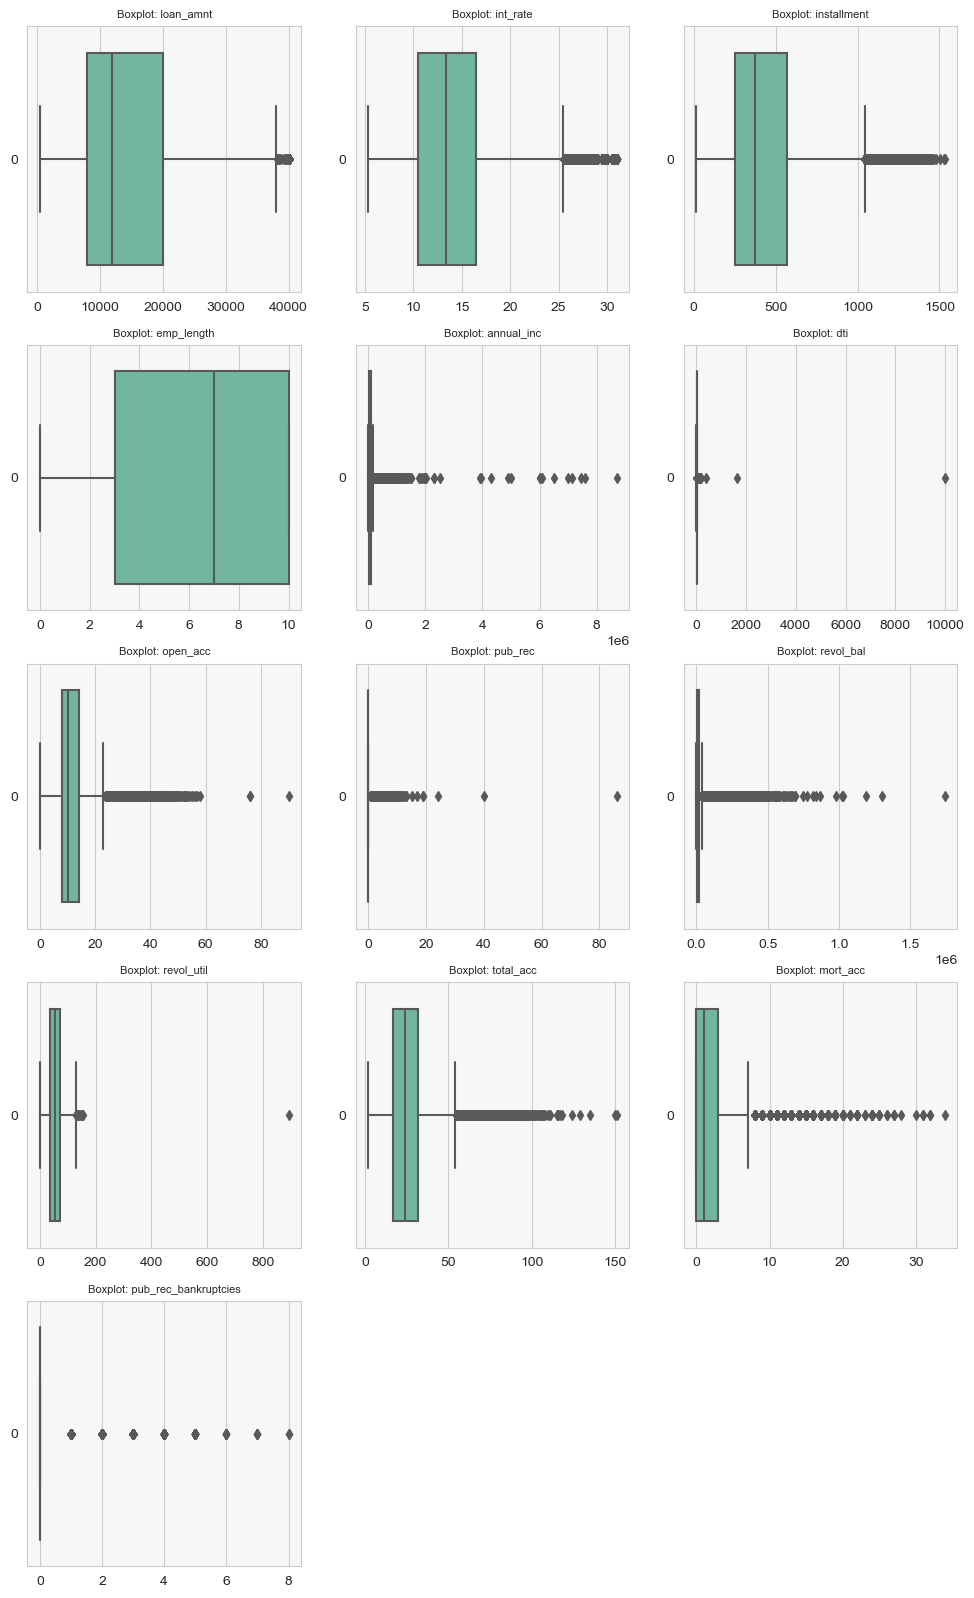

In [ ]:
fig = plt.figure(figsize=(12,20))
i = 1
for col in num_col:
    plt.subplot(5,3,i)
    sns.boxplot(df2[col], orient='h')
    plt.title(f'Boxplot: {col}', fontsize=8)
    i+=1

We have outliers. some of the features are dicreate in nature.

### Outliers treatment

**open_acc**

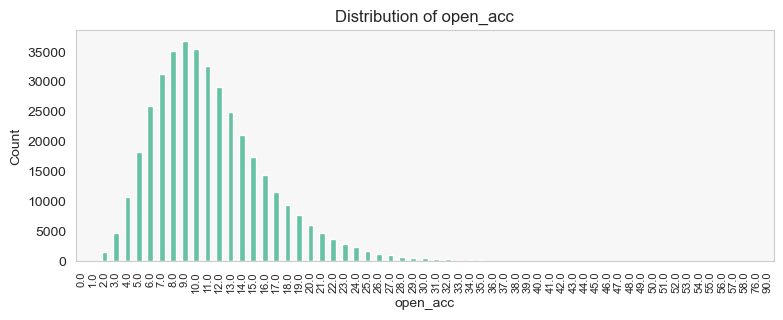

In [ ]:
plt.figure(figsize=(9,3));
df2.groupby(['open_acc'])['open_acc'].count().plot(kind='bar');
plt.title('Distribution of open_acc');
plt.ylabel('Count');
plt.xticks(fontsize=8);
plt.grid(False);

**revol_bal**

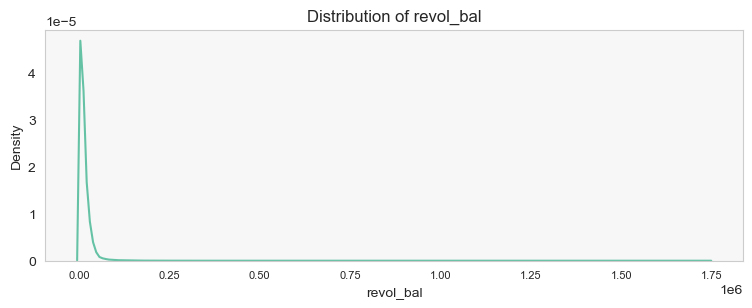

In [ ]:
plt.figure(figsize=(9,3));
sns.kdeplot(df2['revol_bal']);
plt.title('Distribution of revol_bal');
plt.xticks(fontsize=8);
plt.grid(False);

**revol_util**

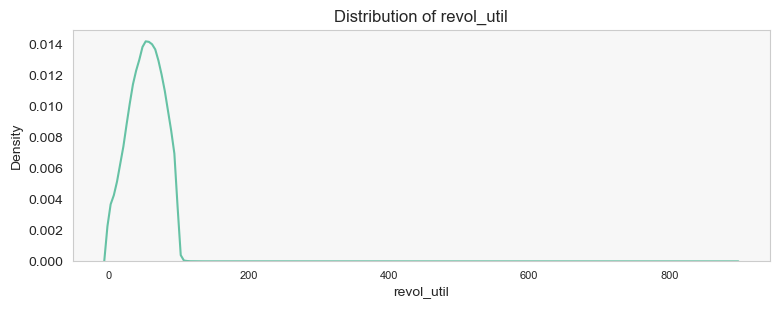

In [ ]:
plt.figure(figsize=(9,3))
sns.kdeplot(df2['revol_util']);
plt.title('Distribution of revol_util')
plt.xticks(fontsize=8);
plt.grid(False);

**total_acc**

<Figure size 900x300 with 0 Axes>

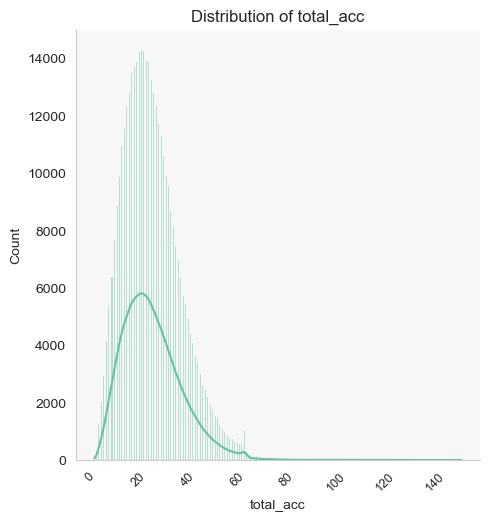

In [ ]:
plt.figure(figsize=(9,3))
sns.displot(df2['total_acc'], kde=True);
plt.title('Distribution of total_acc');
plt.xticks(rotation = 45, fontsize=9);
plt.ylabel('Count');
plt.grid(False);

**pub_rec**

In [ ]:
df['pub_rec'].value_counts()

pub_rec
0.0     338272
1.0      49739
2.0       5476
3.0       1521
4.0        527
5.0        237
6.0        122
7.0         56
8.0         34
9.0         12
10.0        11
11.0         8
13.0         4
12.0         4
19.0         2
40.0         1
17.0         1
86.0         1
24.0         1
15.0         1
Name: count, dtype: int64

In [ ]:
# We'll cap this to 10
df.loc[df2['pub_rec']>10, 'pub_rec'] = 10

**mort_acc**

In [ ]:
df2['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      98211
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

In [ ]:
# We'll cap this to 10
df.loc[df2['mort_acc']>10, 'mort_acc'] = 10

**pub_rec_bankruptcies**

In [ ]:
df2['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    350915
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: count, dtype: int64

**emp_title**

In [ ]:
df2['emp_title'].value_counts(normalize = True).head(50)

emp_title
unknown                     0.057892
manager                     0.014234
teacher                     0.013711
registered nurse            0.006633
supervisor                  0.006542
sales                       0.006015
driver                      0.005823
owner                       0.005558
rn                          0.005237
project manager             0.004485
office manager              0.004136
general manager             0.003689
truck driver                0.003252
director                    0.003010
engineer                    0.003000
police officer              0.002629
vice president              0.002429
sales manager               0.002427
operations manager          0.002427
store manager               0.002376
president                   0.002214
administrative assistant    0.002184
accountant                  0.002134
account manager             0.002134
technician                  0.002119
mechanic                    0.001901
attorney                    

**purpose**

In [ ]:
df2['purpose'].value_counts(normalize = True)

purpose
debt_consolidation    0.592145
credit_card           0.209628
home_improvement      0.060677
other                 0.053493
major_purchase        0.022195
small_business        0.014395
car                   0.011860
medical               0.010595
moving                0.007207
vacation              0.006191
house                 0.005558
wedding               0.004575
renewable_energy      0.000831
educational           0.000649
Name: proportion, dtype: float64

In [ ]:
# keeping the purposes with >1
top_purpose = df2['purpose'].value_counts().nlargest(8).index
df2['purpose'] = df2['purpose'].apply(lambda x: x if x in top_purpose else 'other')

In [ ]:
df2['purpose'].value_counts(normalize = True)

purpose
debt_consolidation    0.592145
credit_card           0.209628
other                 0.078504
home_improvement      0.060677
major_purchase        0.022195
small_business        0.014395
car                   0.011860
medical               0.010595
Name: proportion, dtype: float64

**title**

In [ ]:
df2['title'].value_counts(normalize = True).head(10)

title
debt consolidation         0.460508
credit card refinancing    0.151665
home improvement           0.043221
other                      0.032808
major purchase             0.012620
personal loan              0.009911
business                   0.007618
medical expenses           0.007121
car financing              0.005454
vacation                   0.004712
Name: proportion, dtype: float64

In [ ]:
# Keeping the top 8 purposes and making rest as other
top_titles = df2['title'].value_counts().nlargest(8).index
df2['title'] = df2['title'].apply(lambda x: x if x in top_titles else 'other')

In [ ]:
df2['title'].value_counts(normalize = True)

title
debt consolidation         0.460508
other                      0.307335
credit card refinancing    0.151665
home improvement           0.043221
major purchase             0.012620
personal loan              0.009911
business                   0.007618
medical expenses           0.007121
Name: proportion, dtype: float64

**home_ownership**

In [ ]:
df2['home_ownership'].value_counts(normalize = True)

home_ownership
MORTGAGE    0.500841
RENT        0.403480
OWN         0.095311
OTHER       0.000283
NONE        0.000078
ANY         0.000008
Name: proportion, dtype: float64

In [ ]:
# Keeping the top 8 purposes and making rest as other
top_home_ownership = df2['home_ownership'].value_counts().nlargest(4).index
df2['home_ownership'] = df2['home_ownership'].apply(lambda x: x if x in top_home_ownership else 'OTHER')

In [ ]:
df2['home_ownership'].value_counts(normalize = True)

home_ownership
MORTGAGE    0.500841
RENT        0.403480
OWN         0.095311
OTHER       0.000369
Name: proportion, dtype: float64

**Outlier Treatment**

In [ ]:
num_cols = ['loan_amnt', 'int_rate', 'installment', 'annual_inc',
       'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc']
# We have outliers on the upper side
for var in num_cols:
    q1 = np.quantile(df2[var],0.25)
    q3 = np.quantile(df2[var],0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 *iqr

    # upper_side_capping
    df2.loc[df2[var] > upper_limit, var] = upper_limit

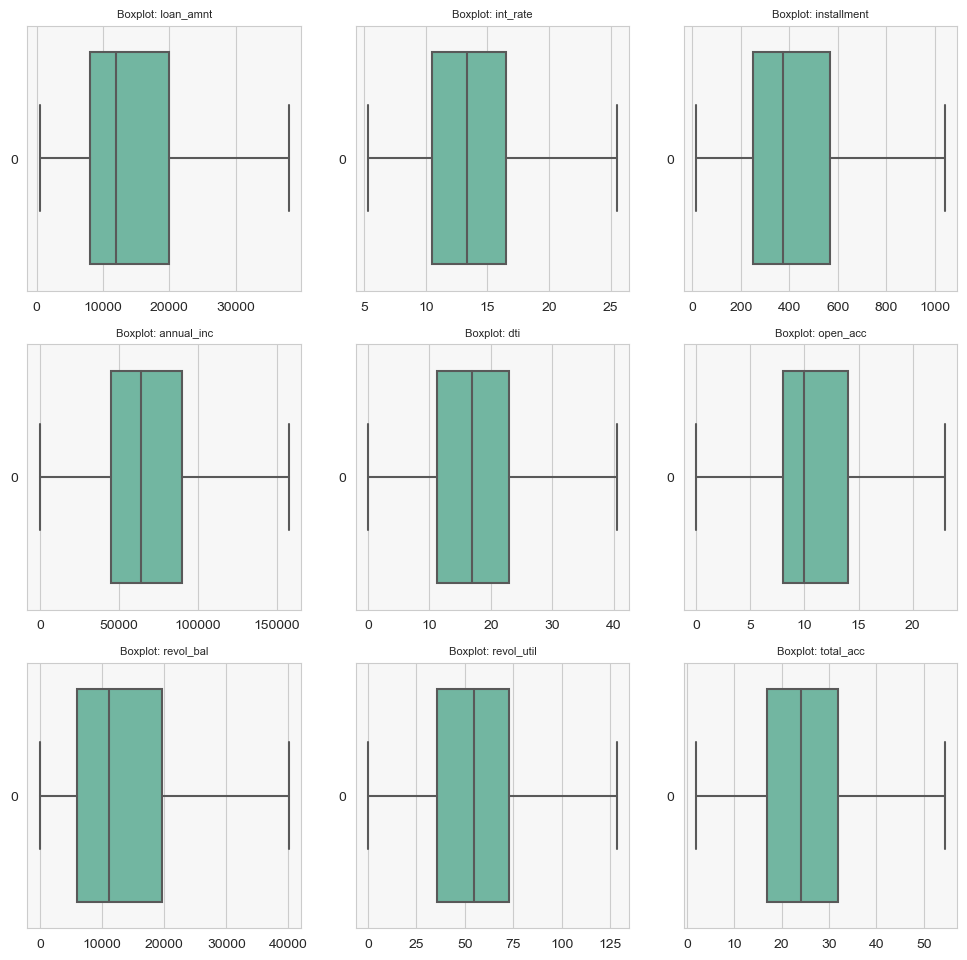

In [ ]:
fig = plt.figure(figsize=(12,20))
i = 1
for col in num_cols:
    plt.subplot(5,3,i)
    sns.boxplot(df2[col], orient='h')
    plt.title(f'Boxplot: {col}', fontsize=8)
    i+=1

## Feature Engineering

In [ ]:
df3 = df2.copy()

### Creation of Flags

In [ ]:
# For attributes Pub_rec, Mort_acc, and Pub_rec_bankruptcies, creating binary flags

df3['pub_rec_flag'] = df3['pub_rec'].apply(lambda x: 0 if x == 0  else 1)
df3['mort_acc_flag'] = df3['mort_acc'].apply(lambda x: 0 if x == 0  else 1)
df3['pub_rec_bankruptcies_flag'] = df3['pub_rec_bankruptcies'].apply(lambda x: 0 if x == 0  else 1)

In [ ]:
df3.drop(columns=['pub_rec', 'mort_acc', 'pub_rec_bankruptcies'], inplace=True)

### Extracting month and year

In [ ]:
df3['issue_month'] = df3['issue_d'].dt.month

In [ ]:
df3['credit_history'] = ((df3['issue_d'] - df3['earliest_cr_line'])/np.timedelta64(1, 'Y')).astype(int)

In [ ]:
df3.loc[:,['issue_d', 'earliest_cr_line', 'issue_month', 'credit_history']].head()

issue_d earliest_cr_line  issue_month  credit_history
0 2015-01-01       1990-06-01            1              24
1 2015-01-01       2004-07-01            1              10
2 2015-01-01       2007-08-01            1               7
3 2014-11-01       2006-09-01           11               8
4 2013-04-01       1999-03-01            4              14

In [ ]:
df4 = df3.copy()

In [ ]:
df4.drop(columns = ['issue_d', 'earliest_cr_line'], inplace = True)

## Multicollinearity and Feature Selection

In [ ]:
## Getting the Numerical columns
num_col = df4.columns[(df4.dtypes == 'int64') | (df4.dtypes == 'float64')]
num_col

Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc',
       'pub_rec_flag', 'mort_acc_flag', 'pub_rec_bankruptcies_flag'],
      dtype='object')

In [ ]:
X_num= df4[num_col]

<AxesSubplot:>

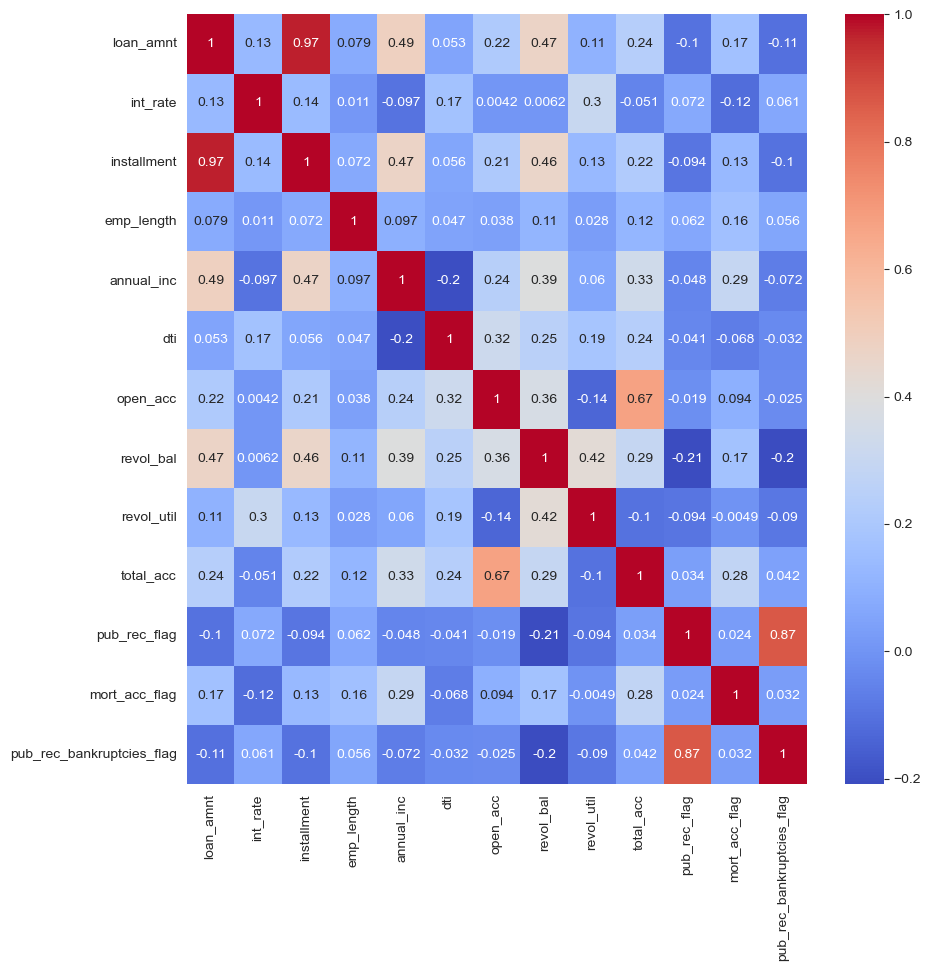

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(X_num.corr(method='spearman'), annot=True, cmap='coolwarm')

### VIF

In [ ]:
vif = pd.DataFrame() # blank dataframe to store VIF Values
X_t = pd.DataFrame(X_num, columns=X_num.columns) # add values and columns to dataframe
vif['Features'] = X_num.columns
vif['VIF'] = [variance_inflation_factor(X_num.values, i) for i in range(X_num.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

Features    VIF
2  installment  51.78
0    loan_amnt  50.46
6     open_acc  13.67
9    total_acc  12.64
1     int_rate  10.66

### RFE (Recursive Feature Elimination)

In [ ]:
X_num = X_num.drop(columns=['installment'])
vif = pd.DataFrame() # blank dataframe to store VIF Values
X_t = pd.DataFrame(X_num, columns=X_num.columns) # add values and columns to dataframe
vif['Features'] = X_num.columns
vif['VIF'] = [variance_inflation_factor(X_num.values, i) for i in range(X_num.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

Features    VIF
5    open_acc  13.60
8   total_acc  12.63
1    int_rate  10.66
3  annual_inc   8.30
7  revol_util   8.02

In [ ]:
X_num = X_num.drop(columns=['open_acc'])
vif = pd.DataFrame() # blank dataframe to store VIF Values
X_t = pd.DataFrame(X_num, columns=X_num.columns) # add values and columns to dataframe
vif['Features'] = X_num.columns
vif['VIF'] = [variance_inflation_factor(X_num.values, i) for i in range(X_num.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

Features    VIF
1    int_rate  10.17
3  annual_inc   8.13
7   total_acc   7.81
6  revol_util   7.73
4         dti   6.86

**Interest Rate is one of the important features in Bank's Business, Thus we do not want to go further in feature elemination, Thus keeping rest of the features**

In [ ]:
selected_features = df4.columns.drop(['installment', 'open_acc'])

In [ ]:
df5 = df4[selected_features]
df5.head()

loan_amnt        term  int_rate grade sub_grade                emp_title  \
0    10000.0   36 months     11.44     B        B4                marketing   
1     8000.0   36 months     11.99     B        B5          credit analyst    
2    15600.0   36 months     10.49     B        B3             statistician   
3     7200.0   36 months      6.49     A        A2          client advocate   
4    24375.0   60 months     17.27     C        C5  destiny management inc.   

   emp_length home_ownership  annual_inc verification_status  ... total_acc  \
0        10.0           RENT    117000.0        Not Verified  ...      25.0   
1         4.0       MORTGAGE     65000.0        Not Verified  ...      27.0   
2         0.0           RENT     43057.0     Source Verified  ...      26.0   
3         6.0           RENT     54000.0        Not Verified  ...      13.0   
4         9.0       MORTGAGE     55000.0            Verified  ...      43.0   

  initial_list_status application_type         region  state  pub_rec_flag  \
0                   w       INDIVIDUAL   Mendozaberg      OK             0   
1                   f       INDIVIDUAL    Loganmouth      SD             0   
2                   f       INDIVIDUAL   New Sabrina      WV             0   
3                   f       INDIVIDUAL  Delacruzside      MA             0   
4                   f       INDIVIDUAL    Greggshire      VA             0   

   mort_acc_flag pub_rec_bankruptcies_flag issue_month credit_history  
0              0                         0           1             24  
1              1                         0           1             10  
2              0                         0           1              7  
3              0                         0          11              8  
4              1                         0           4             14  

[5 rows x 26 columns]

## Data preparation for modeling

### Encoding

- Label Encoding for the Binary Variables - 'term', 'loan_status'
- Ordinal Encoding for the ordinal variables - 'grade',  'sub_grade', 'verification_status'
- Target Encoding (Binary) for all remaining variables

In [ ]:
def labelencoder(var):
    le = LabelEncoder()
    for i in var:
        df5[i] = le.fit_transform(df4[i])

In [ ]:
var = ['term', 'loan_status']
labelencoder(var)

In [ ]:
cats = df5['grade'].cat.categories[::-1].to_list()
enc = OrdinalEncoder(categories=[cats])
df5['grade'] = enc.fit_transform(df5[['grade']])

In [ ]:
cats = df5.sub_grade.cat.categories[::-1].to_list()
enc = OrdinalEncoder(categories=[cats])
df5['sub_grade'] = enc.fit_transform(df5[['sub_grade']])

In [ ]:
cats = df5.verification_status.cat.categories.to_list()
enc = OrdinalEncoder(categories=[cats])
df5['verification_status'] = enc.fit_transform(df5[['verification_status']])

In [ ]:
def targetencoder(var):
    enc = TargetEncoder(target_type='binary')
    for i in var:
        df5[i] = enc.fit_transform(df5[i].values.reshape(-1,1) , df5['loan_status'])

In [ ]:
var = ['emp_title', 'home_ownership', 'purpose', 'title',
       'initial_list_status', 'application_type', 'region','state']
targetencoder(var)

In [ ]:
df5.dtypes

loan_amnt                    float64
term                           int32
int_rate                     float64
grade                        float64
sub_grade                    float64
emp_title                    float64
emp_length                   float64
home_ownership               float64
annual_inc                   float64
verification_status          float64
loan_status                    int32
purpose                      float64
title                        float64
dti                          float64
revol_bal                    float64
revol_util                   float64
total_acc                    float64
initial_list_status          float64
application_type             float64
region                       float64
state                        float64
pub_rec_flag                   int64
mort_acc_flag                  int64
pub_rec_bankruptcies_flag      int64
issue_month                    int32
credit_history                 int32
dtype: object

# Model Building

In [ ]:
# DV and IDVs split
X = df5[df5.columns.drop('loan_status')]
y = df5['loan_status']

In [ ]:
# Train, validation, and test split
X_train_val, X_test,y_train_val, y_test= train_test_split(X,y, test_size=0.15)
X_train, X_val,y_train, y_val = train_test_split(X_train_val,y_train_val, test_size=0.1765)
X_train.shape,X_val.shape, X_test.shape

((277210, 25), (59415, 25), (59405, 25))

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=X.columns)

In [ ]:
# Logistic Regression Model
lgr = LogisticRegression()
lgr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
wt = pd.DataFrame()
wt['Features'] = X.columns
wt['Weight'] = lgr.coef_[0]

In [ ]:
wt.sort_values(by=['Weight'],ascending=False)

Features    Weight
4                   sub_grade  0.710293
2                    int_rate  0.233899
8                  annual_inc  0.170605
5                   emp_title  0.142834
7              home_ownership  0.090496
21              mort_acc_flag  0.082576
22  pub_rec_bankruptcies_flag  0.065194
13                  revol_bal  0.054367
11                      title  0.046263
23                issue_month  0.039205
15                  total_acc  0.024818
10                    purpose  0.017534
6                  emp_length  0.010770
19                      state  0.001686
18                     region -0.003691
17           application_type -0.004095
24             credit_history -0.017645
16        initial_list_status -0.020269
3                       grade -0.025861
9         verification_status -0.033486
20               pub_rec_flag -0.074535
14                 revol_util -0.093123
0                   loan_amnt -0.103762
1                        term -0.171319
12                        dti -0.204595

In [ ]:
lgr.intercept_

array([1.58478089])

In [ ]:
## Making Predictions
y_pred_val=lgr.predict(X_val)
y_pred_val[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# Defining Accuracy function
def accuracy(y_true, y_pred):
    return np.sum(y_true==y_pred)/len(y_true)

# Validation acuuracy
accuracy(y_val, y_pred_val)

0.8041908608937137

In [ ]:
# Validation accuracy
lgr.score(X_val, y_val)

0.8041908608937137

In [ ]:
# train accuracy
lgr.score(X_train,y_train)

0.8063778362973919

In [ ]:
print(f"Val Accuracy Score: {accuracy_score(y_val,y_pred_val):.4f}")
print(f"Val Precision Score: {precision_score(y_val,y_pred_val):.4f}" )
print(f"Val Recall Score: {recall_score(y_val,y_pred_val):.4f}")
print(f"Val F1 Score: {f1_score(y_val,y_pred_val):.4f}")

Val Accuracy Score: 0.8042
Val Precision Score: 0.8148
Val Recall Score: 0.9790
Val F1 Score: 0.8894


In [ ]:
y_pred_test=lgr.predict(X_test)

print(f"test Accuracy Score: {accuracy_score(y_test,y_pred_test):.4f}")
print(f"test Precision Score: {precision_score(y_test,y_pred_test):.4f}" )
print(f"test Recall Score: {recall_score(y_test,y_pred_test):.4f}")
print(f"test F1 Score: {f1_score(y_test,y_pred_test):.4f}")

test Accuracy Score: 0.8052
test Precision Score: 0.8147
test Recall Score: 0.9807
test F1 Score: 0.8900


## Cross Validation

In [ ]:
train_scores = []
val_scores = []

for la in np.arange(0.01, 5000.0, 100): # range of values of Lambda
    model =  LogisticRegression(C=1/la).fit(X_train, y_train)
    train_score = accuracy(y_train, model.predict(X_train))
    val_score = accuracy(y_val, model.predict(X_val))

    train_scores.append(train_score)
    val_scores.append(val_score)

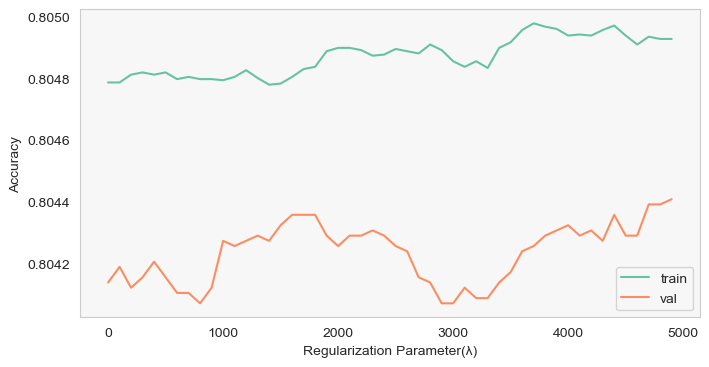

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(list(np.arange(0.01, 5000.0, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 5000.0, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

## AU - ROC

In [ ]:
# Extracting Probabilities
y_pred_prob = lgr.predict_proba(X_val)
y_pred_prob[:5]

array([[0.1039017 , 0.8960983 ],
       [0.52036597, 0.47963403],
       [0.11035786, 0.88964214],
       [0.08734131, 0.91265869],
       [0.19039491, 0.80960509]])

In [ ]:
y_proba = y_pred_prob[:,1]
y_proba

array([0.8960983 , 0.47963403, 0.88964214, ..., 0.82538008, 0.88352023,
       0.89054426])

In [ ]:
print("AU ROC:", roc_auc_score(y_val, y_proba))

AU ROC: 0.7083315195786347


In [ ]:
fpr, tpr, thresholds  = roc_curve(y_val,y_proba)
fpr

array([0.        , 0.        , 0.        , ..., 0.99914821, 0.99914821,
       1.        ])

In [ ]:
tpr

array([0.00000000e+00, 2.09753540e-05, 1.25852124e-03, ...,
       9.99979025e-01, 1.00000000e+00, 1.00000000e+00])

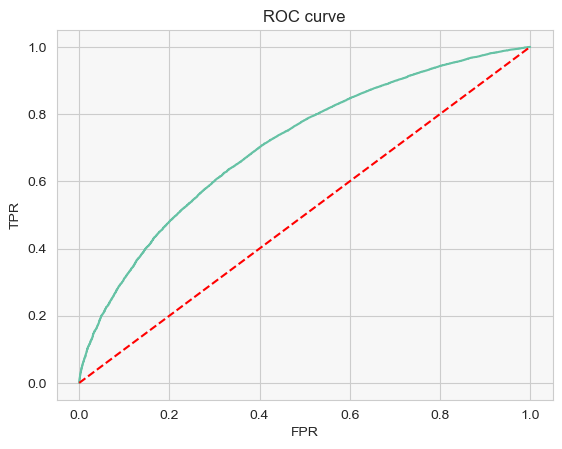

In [ ]:
plt.plot(fpr,tpr)

#random model
plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

**The ROC curve is not showing a perfect knee, Thus finalising a threshold is difficult here**

## PR Curve

In [ ]:
pr,re, thr= precision_recall_curve(y_val,y_proba)
pr, re, thr

(array([0.8024068 , 0.8024203 , 0.80243381, ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        4.19507079e-05, 2.09753540e-05, 0.00000000e+00]),
 array([0.15346868, 0.179477  , 0.18170512, ..., 0.97579705, 0.97635056,
        0.97679598]))

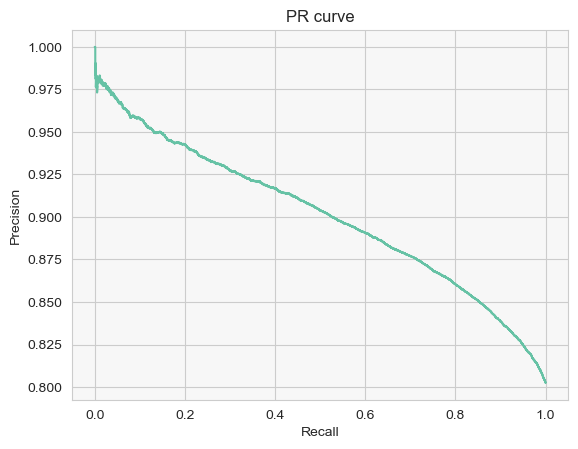

In [ ]:
plt.plot(re,pr)

#random model
plt.title('PR curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [ ]:
auc(re,pr) # area under PR Curve

0.9008377476338183

AUC-PR of 90% reflects strong performance in terms of precision-recall trade-off, particularly in situations with imbalanced datasets or when the positive class is rare. It suggests that the model is effective in identifying positive instances while maintaining a low rate of false positives. However, it's essential to consider the specific requirements of your application and balance precision and recall based on your objectives.

# Confusion Matrix

Training Accuracy: 0.8064
Val Accuracy:0.8042
Train F1 Acc: 0.8907
Val F1 Score: 0.8894
Precision Score: 0.8148
Recall Score: 0.9790
              precision    recall  f1-score   support

           0       0.50      0.09      0.15     11653
           1       0.81      0.98      0.89     47762

    accuracy                           0.80     59415
   macro avg       0.66      0.53      0.52     59415
weighted avg       0.75      0.80      0.74     59415



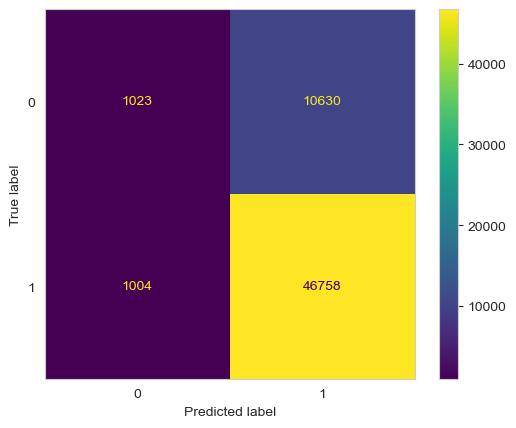

In [ ]:
model = LogisticRegression()

model.fit(X_train,y_train)

print(f"Training Accuracy: {model.score(X_train,y_train):.4f}")
print(f"Val Accuracy:{model.score(X_val,y_val):.4f}")

y_pred_train=model.predict(X_train)
print(f"Train F1 Acc: {f1_score(y_train,y_pred_train):.4f}")
y_pred_val=model.predict(X_val)
print(f"Val F1 Score: {f1_score(y_val,y_pred_val):.4f}")
print(f"Precision Score: {precision_score(y_val,y_pred_val):.4f}")
print(f"Recall Score: {recall_score(y_val,y_pred_val):.4f}")

print(classification_report(y_val,y_pred_val))


conf_matrix = confusion_matrix(y_val, y_pred_val)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.grid(False)

# Handling Data Imbalance

## Adding Class Weight

In [ ]:
df4.loan_status.value_counts()[1]/df4.loan_status.value_counts()[0]


4.098682940017767

Training Accuracy: 0.6642
Val Accuracy:0.6651
Train F1 Acc: 0.7631
Val F1 Score: 0.7637
Precision Score: 0.8801
Recall Score: 0.6746


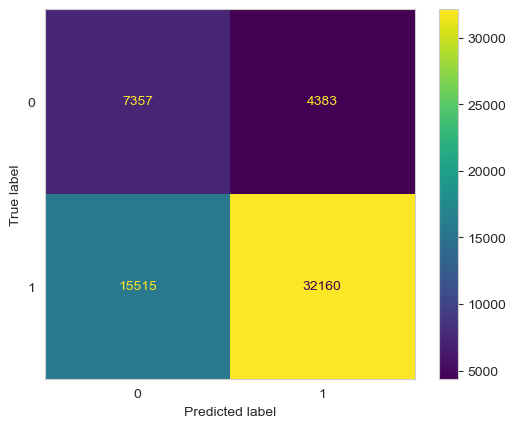

In [ ]:
model = LogisticRegression(class_weight={0:4.0, 1:1})

model.fit(X_train,y_train)

print(f"Training Accuracy: {model.score(X_train,y_train):.4f}")
print(f"Val Accuracy:{model.score(X_val,y_val):.4f}")

y_pred_train=model.predict(X_train)
print(f"Train F1 Acc: {f1_score(y_train,y_pred_train):.4f}")
y_pred_val=model.predict(X_val)
print(f"Val F1 Score: {f1_score(y_val,y_pred_val):.4f}")
print(f"Precision Score: {precision_score(y_val,y_pred_val):.4f}")
print(f"Recall Score: {recall_score(y_val,y_pred_val):.4f}")

conf_matrix = confusion_matrix(y_val, y_pred_val)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.grid(False)

**Adding Class Weight is not helping us with model improvement**

## Oversampling

### Random Sampler

In [ ]:
oversampler = RandomOverSampler()

print("Before Oversampling\n", y_train.value_counts())
X_train_ovs, y_train_ovs = oversampler.fit_resample(X_train,y_train)

print("Before AfterOversampling\n", y_train_ovs.value_counts())

Before Oversampling
 loan_status
1    222817
0     54393
Name: count, dtype: int64
Before AfterOversampling
 loan_status
1    222817
0    222817
Name: count, dtype: int64


Training Accuracy: 0.6512
Val Accuracy:0.6582
Train F1 Acc: 0.6549
Val F1 Score: 0.7570
Precision Score: 0.8812
Recall Score: 0.6635


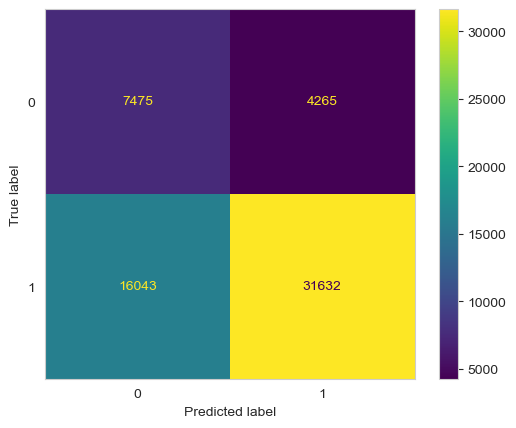

In [ ]:
model = LogisticRegression()
model.fit(X_train_ovs,y_train_ovs)

print(f"Training Accuracy: {model.score(X_train_ovs,y_train_ovs):.4f}")
print(f"Val Accuracy:{model.score(X_val,y_val):.4f}")

y_pred_train=model.predict(X_train_ovs)
print(f"Train F1 Acc: {f1_score(y_train_ovs,y_pred_train):.4f}")
y_pred_val=model.predict(X_val)
print(f"Val F1 Score: {f1_score(y_val,y_pred_val):.4f}")
print(f"Precision Score: {precision_score(y_val,y_pred_val):.4f}")
print(f"Recall Score: {recall_score(y_val,y_pred_val):.4f}")

conf_matrix = confusion_matrix(y_val, y_pred_val)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.grid(False)

**Thus, Random Sampling, as well, is not helping us with model improvement**

## SMOTE

In [ ]:
smt = SMOTE()
print("Before Oversampling\n", y_train.value_counts())
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)
print("Before AfterOversampling\n", y_train_sm.value_counts())

Before Oversampling
 loan_status
1    222853
0     54357
Name: count, dtype: int64
Before AfterOversampling
 loan_status
1    222853
0    222853
Name: count, dtype: int64


Training Accuracy: 0.6548
Val Accuracy:0.6578
Train F1 Acc: 0.6567
Val F1 Score: 0.7565
Precision Score: 0.8815
Recall Score: 0.6626


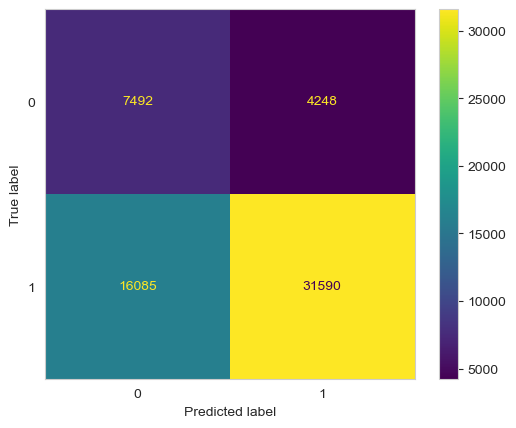

In [ ]:
model = LogisticRegression()

model.fit(X_train_sm,y_train_sm)

print(f"Training Accuracy: {model.score(X_train_sm,y_train_sm):.4f}")
print(f"Val Accuracy:{model.score(X_val,y_val):.4f}")

y_pred_train=model.predict(X_train_sm)
print(f"Train F1 Acc: {f1_score(y_train_sm,y_pred_train):.4f}")
y_pred_val=model.predict(X_val)
print(f"Val F1 Score: {f1_score(y_val,y_pred_val):.4f}")
print(f"Precision Score: {precision_score(y_val,y_pred_val):.4f}")
print(f"Recall Score: {recall_score(y_val,y_pred_val):.4f}")

conf_matrix = confusion_matrix(y_val, y_pred_val)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.grid(False)

**How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it. (10 Points)**

To keep very less False Positives, oversampling techniques like SMOTE should be used in model creation. Also we can use more complex algorithms like SVM, Decision-Trees, Random Forest and also try various hyperparameter tunning.
As you can see from the data, the percentage of defaulters is slightly higher than Banking industry.

**Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone. (10 Points)**

Yes. LoanTap should not disburse loans to everyone. Company’s internal policy and analysis should be in place to identify the correct persons. From data provided, 20% of people default on their loan, which inturn become NPAs for the company.

Low False positive means we should create the model with high Precision values. This can be achieved if we are keeping high threshold value in logistic Regression model.

But keeping too high values for threshold will increase False Negatives. This intuen may result in opportunity loss. In this case we will not give loans to persons which will not default but our model has predicted that they will default.

# Regularisation

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Define the logistic regression model
lgr = LogisticRegression()

# Specify the parameter grid
param_grid = {'C': [1, 5, 10, 15, 20],
              'penalty': ['l1', 'l2'],
              'solver': ['lbfgs', 'liblinear']}

# Define the F1 scorer
f1_scorer = make_scorer(f1_score)

# Create GridSearchCV
grid_search = GridSearchCV(estimator=lgr, param_grid=param_grid, scoring=f1_scorer, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding F1-score
print("Best Parameters: ", grid_search.best_params_)
print("Best F1-score: {:.4f}".format(grid_search.best_score_))

# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)
val_f1_score = f1_score(y_val, y_pred)
print("F1-score on Val Set: {:.4f}".format(val_f1_score))

Best Parameters:  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best F1-score: 0.8901
F1-score on Test Set: 0.8896


In [ ]:
y_pred = best_model.predict(X_test)

print(f"Val Accuracy Score: {accuracy_score(y_test,y_pred):.4f}")
print(f"Val Precision Score: {precision_score(y_test,y_pred):.4f}" )
print(f"Val Recall Score: {recall_score(y_test,y_pred):.4f}")
print(f"Val F1 Score: {f1_score(y_test,y_pred):.4f}")

ValueError: X has 27 features, but LogisticRegression is expecting 22 features as input.

# Insights

1. **Loan Term Preference and Risk**: A majority of borrowers prefer a shorter loan term of 36 months. Shorter terms are generally associated with lower risk and might indicate a borrower's confidence in repayment ability.

2. **Loan Grade Concentration**: The concentration of loans in the B, C, and A categories suggests these grades are most common and potentially the most reliable segments.

3. **Employment Stability and Loan Purpose**: The long employment duration of many borrowers indicates stability, which is a positive sign for lenders. The primary purpose of loans being debt consolidation reflects a trend towards financial management and restructuring by borrowers.

4. **High Outlier Percentages**: The significant outlier percentages in features like Pub_Rec, Revol_Bal, and Annual_Inc highlight the need for careful outlier handling and data validation processes.

5. **Correlation Insights**: The high correlation between loan amount and installment (0.95 Pearson, 0.97 Spearman) suggests that these two variables are strongly linked in their behavior.

6. **Impact of Loan Terms and Grades on Risk**: Longer-term loans (60 months) and higher grades (towards G) are riskier, which may influence lending strategies and interest rates.

7. **Verification Status**: The fact that verification doesn't necessarily guarantee a loan being fully paid implies that other factors play a significant role in loan performance.


# Recommendations

1. **Risk Management Strategies**: Given the association of higher interest rates, higher loan amounts, and higher DTI ratios with increased risk of default, lenders should consider adjusting their risk assessment models to factor in these elements more significantly.

2. **Tailored Loan Products**: Develop tailored loan products for the most common borrower segments (B, C, and A grade borrowers) to enhance product-market fit.

3. **Enhanced Data Validation**: Implement robust data validation and outlier management strategies to ensure data accuracy, especially for variables with high outlier percentages.

4. **Regional Risk Assessment**: Incorporate geographical data into risk assessments to account for regional variations in default rates.

5. **Loan Term Structuring**: Offer more flexible terms for higher-grade loans and consider stricter terms for longer-term and lower-grade loans to mitigate risk.

6. **Diversification of Loan Purposes**: While debt consolidation is predominant, diversifying the portfolio with other loan purposes could spread risk.

7. **Further Statistical Analysis**: Conduct further statistical tests to validate the significance of observed correlations and insights, ensuring that lending strategies are data-driven.

8. **Monitoring and Adjustment of Models**: Continuously monitor and adjust credit scoring models in response to changes in borrower behavior and economic conditions.

# Questionnaire

## 1. What percentage of customers have fully paid their Loan Amount?

<AxesSubplot:ylabel='proportion'>

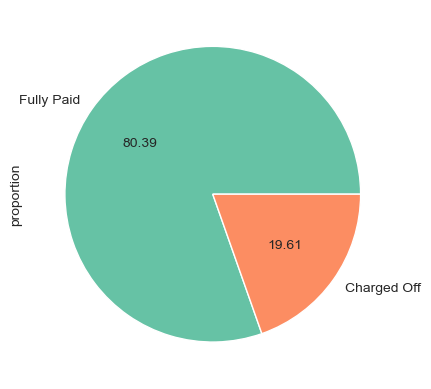

In [ ]:
df['loan_status'].value_counts(normalize=True).plot(kind='pie', autopct = '%.2f')

## 2. Comment about the correlation between Loan Amount and Installment features.

In [ ]:
features_pd = df.loc[:, ['loan_amnt', 'installment']]
features_pd.corr()

loan_amnt  installment
loan_amnt     1.000000     0.953929
installment   0.953929     1.000000

In [ ]:
features_pd.corr(method='spearman')

loan_amnt  installment
loan_amnt     1.000000     0.968334
installment   0.968334     1.000000

## 3. The majority of people have home ownership as _______.?

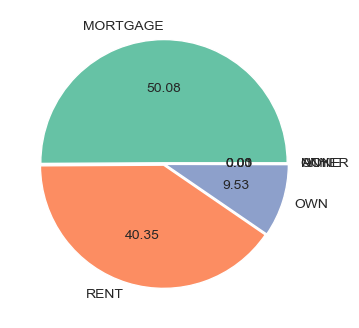

In [ ]:
plt.figure(figsize= (4,4))
ho = df['home_ownership'].value_counts(normalize=True)
plt.pie(ho, explode= [0.01]*len(ho), labels= ho.index, autopct='%.2f');
plt.show()

In [ ]:
df['home_ownership'].value_counts(normalize=True)

home_ownership
MORTGAGE    0.500841
RENT        0.403480
OWN         0.095311
OTHER       0.000283
NONE        0.000078
ANY         0.000008
Name: proportion, dtype: float64

## 4. People with grades ‘A’ are more likely to fully pay their loan. (T/F)

<AxesSubplot:xlabel='grade'>

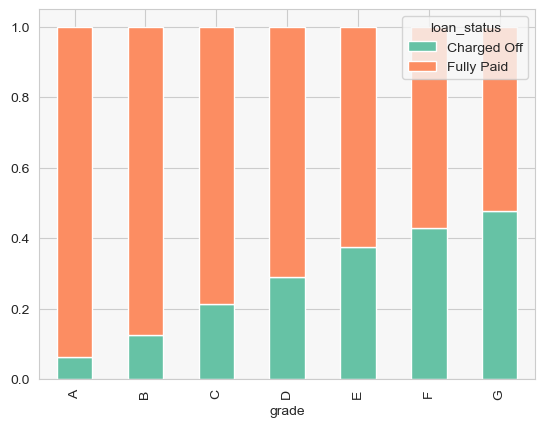

In [ ]:
pd.crosstab(df['grade'], df['loan_status'], normalize="index").plot(kind='bar', stacked=True)

In [ ]:
pd.crosstab(df['loan_status'],df['grade'], normalize='columns')

grade               A        B         C         D         E        F  \
loan_status                                                             
Charged Off  0.062879  0.12573  0.211809  0.288678  0.373634  0.42788   
Fully Paid   0.937121  0.87427  0.788191  0.711322  0.626366  0.57212   

grade               G  
loan_status            
Charged Off  0.478389  
Fully Paid   0.521611

## 5. Name the top 2 afforded job titles.

In [ ]:
from scipy.stats import chi2_contingency, chisquare, chi2

In [ ]:
pvalue = chi2_contingency(pd.crosstab(df['loan_status'],df['grade']))[1]
pvalue

0.0

In [ ]:
# 5. Name the top 2 afforded job titles.
df.groupby(['emp_title'])['emp_title'].count().sort_values(ascending=False)
# df['emp_title'].value_counts(normalize=True)

emp_title
Teacher                             4389
Manager                             4250
Registered Nurse                    1856
RN                                  1846
Supervisor                          1830
                                    ... 
Hy Powered                             1
Hy Vee                                 1
Hy-Vee Food Store                      1
HyPro, Inc.                            1
​License Compliance Investigator       1
Name: emp_title, Length: 173105, dtype: int64

## 6. Thinking from a bank's perspective, which metric should our primary focus be on
1. ROC AUC
2. Precision
3. Recall
4. F1 Score

From a bank's perspective, the choice of evaluation metric depends on the specific goals and priorities of the fraud detection system. Here's a brief explanation of each metric and considerations for a bank:

1. **ROC-AUC (Receiver Operating Characteristic - Area Under the Curve):**
   - ROC-AUC is a metric that evaluates the overall performance of a binary classification model across different probability thresholds. It considers both sensitivity (recall) and specificity. A higher ROC-AUC score indicates better discrimination between positive and negative instances.

   - **Consideration:** ROC-AUC is a good metric when the trade-off between true positive rate (recall) and false positive rate is important. It provides a comprehensive view of the model's ability to discriminate between fraud and non-fraud instances.

2. **Precision:**
   - Precision is the ratio of true positive predictions to the total predicted positives. It measures the accuracy of the positive predictions.

   - **Consideration:** Precision is important when minimizing false positives (incorrectly identifying non-fraud transactions as fraud) is a priority for the bank. This is crucial to avoid inconveniencing legitimate customers.

3. **Recall:**
   - Recall (Sensitivity or True Positive Rate) is the ratio of true positive predictions to the total actual positives. It measures the ability to capture all instances of fraud.

   - **Consideration:** Recall is important when the primary concern is capturing as many fraudulent transactions as possible, even at the cost of some false positives. It focuses on minimizing false negatives (missing actual fraud).

4. **F1-Score:**
   - F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall.

   - **Consideration:** F1-score is suitable when there is a need to balance the trade-off between precision and recall. It is particularly useful when there is an uneven class distribution.

In fraud detection, striking the right balance between false positives and false negatives is often crucial. The choice of the primary metric should align with the bank's specific objectives and the relative costs associated with false positives and false negatives. If there are regulatory requirements or customer satisfaction considerations, precision or recall may be prioritized accordingly.

## 7. How does the gap in precision and recall affect the bank?

The gap between precision and recall in a fraud detection system can have significant implications for a bank, and understanding this trade-off is essential for making informed decisions. Let's explore the impact of the gap in precision and recall:

1. **High Precision, Low Recall:**
   - **Impact on the Bank:** A high precision and low recall scenario means that when the system identifies a transaction as fraudulent, it is highly likely to be correct (few false positives). However, there is a risk of missing many actual fraudulent transactions (high false negatives). The bank may experience lower losses due to false alarms, but it could miss identifying a substantial portion of fraudulent activities.

   - **Implications:** Customer inconvenience may be minimized as fewer legitimate transactions are mistakenly flagged as fraudulent. However, the bank might suffer financial losses due to undetected fraudulent transactions.

2. **High Recall, Low Precision:**
   - **Impact on the Bank:** A high recall and low precision scenario implies that the system identifies a larger proportion of actual fraudulent transactions (few false negatives), but at the cost of including more non-fraudulent transactions in the alerts (more false positives). This can lead to increased operational costs and customer dissatisfaction.

   - **Implications:** While the bank may detect a higher percentage of fraud cases, it may also face challenges dealing with a large number of false positives. This could result in increased investigation costs, customer complaints, and potential damage to the bank's reputation.

3. **Balanced Precision and Recall (Trade-off):**
   - **Impact on the Bank:** Striking a balance between precision and recall is often a necessary trade-off. Achieving both high precision and high recall simultaneously can be challenging due to the inherent trade-off between the two metrics.

   - **Implications:** The bank needs to consider the relative costs and consequences of false positives and false negatives. It might involve setting a threshold that aligns with the bank's risk tolerance and regulatory requirements. Balancing precision and recall is crucial to optimizing the system's overall performance.

Ultimately, the impact of the gap between precision and recall depends on the bank's specific goals, priorities, and the consequences associated with false positives and false negatives. It's a strategic decision that should be aligned with the bank's risk appetite, customer experience objectives, and regulatory compliance requirements.

## 8. Which were the features that heavily affected the outcome?

In [ ]:
X = df4[df4.columns.drop('loan_status')]
y= df4['loan_status']
X.shape, y.shape

((396030, 27), (396030,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
X_train.shape, X_test.shape

((316824, 27), (79206, 27))

In [ ]:
## Standard Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# fixing the headers
X_train = pd.DataFrame(X_train, columns=X.columns)

In [ ]:
# Logistic Regression Model
lgr = LogisticRegression()
lgr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
wt = pd.DataFrame()
wt['Features'] = X.columns
wt['Weight'] = abs(lgr.coef_[0])

In [ ]:
wt.sort_values(by=['Weight'],ascending=False).head(5)

Features    Weight
5    sub_grade  0.722317
2     int_rate  0.257620
9   annual_inc  0.183108
13         dti  0.179829
1         term  0.178218

In [ ]:
lgr.intercept_

array([1.58540372])

**Top Features: _sub_grade, int_rate, annual_inc, dti, term_**

## 9. Will the results be affected by geographical location? (Yes/No)

In [ ]:
wt.sort_values(by=['Weight'],ascending=True).head(5)

Features    Weight
21             state  0.000733
20            region  0.001100
19  application_type  0.001247
7         emp_length  0.002469
3        installment  0.006858

**No, Geographical location has negligible impact**